In [2]:
from scipy.special import jv
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
import pandas as pd
import matplotlib as mpl
from floquet_simulations.flux_functions import *
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap
from floquet_simulations.plot_functions import PlotParams
from floquet_simulations.hamiltonians import ConvertComplex
from scipy.special import jn_zeros

PlotParams(fontsize=10)

In [3]:
colour_hex_list_greens = ["#003D37", '#006F63', "#00CCB8", "#38FFEB",'0.8']
colour_rgb_list_greens = [(0, 61, 55), (0, 111, 99), (0, 204, 184), (56, 255, 235),(204, 204, 204)]
colour_rgb_list_greens  = [tuple(ti/255 for ti in lst) for lst in colour_rgb_list_greens]

colour_hex_list_reds = ['0.8',"#FAB766", '#F78320', "#F76120", "#F72020"]
colour_rgb_list_reds = [(204, 204, 204), (250, 183, 102), (247, 131, 32), (247, 97, 32), (247, 32, 32)]
colour_rgb_list_reds = [tuple(ti/255 for ti in lst) for lst in colour_rgb_list_reds]
A2_index_reds = np.linspace(19.2,45,5)


In [4]:
omega0 = 8
alpha=1; beta=2
data_dir = Path().absolute().parent.parent/"paper_data"/f"Heff_omega={omega0},alpha={alpha},beta={beta}.csv"
df = pd.read_csv(data_dir,
                  index_col=False,
                   converters={"FT-J12": ConvertComplex,
                                  "FT-J23": ConvertComplex,
                                  "FT-J31": ConvertComplex,
                                  # "HE-J12": ConvertComplex,
                                  # "HE-J23": ConvertComplex,
                                  # "HE-J31": ConvertComplex,
                                  # "HE-O1": ConvertComplex,
                                  # "HE-O2": ConvertComplex,
                                  # "HE-O3": ConvertComplex
                   }
                  )

# df = df.groupby(by=["A2", "A3", "omega0", "alpha", "beta", "phi3/pi" ]).agg({'FT-J12':"mean", 
#                                              'FT-J23':"mean", 
#                                              'FT-J31':"mean", 
#                                              "FT-LowerT.X":"mean",
# 				                "FT-LowerT.Y":"mean"
#                           }).reset_index()




In [5]:
xi_fixed =  np.angle(df["FT-J23"].to_numpy())+np.angle(df["FT-J12"].to_numpy())+np.angle(df["FT-J31"].to_numpy())
xi_fixed = (xi_fixed + 2*pi)%(2*pi)
xi_fixed = np.where(xi_fixed>pi, xi_fixed-2*pi, xi_fixed)
df["xi_fixed"] = xi_fixed
df["xi12"]= np.angle(df["FT-J12"].to_numpy())
df["xi23"]= np.angle(df["FT-J23"].to_numpy())
df["xi31"]= np.angle(df["FT-J31"].to_numpy())

# 

In [40]:

# df = df[(df.A2 > jn_zeros(0,1)[0]*8)
#         &(df.A2 < jn_zeros(0,2)[1]*8)
#         &(df.A3 < jn_zeros(0,1)[0]*16)
#         ]


In [ ]:
# """
# ABS VAL - keep omega_0 constant (omega0=8)
#     |
#     |
# \xi |
#     |
#     |____________
#           \phi
# - omega_0 constant (omega0=5)
# - compare Ham Evolution and First Term
# - color is A2
# - increase A3 over time
# """

# coloured by A2

"""
Phases - vary phi
"""
omega0 = 8

phasesFigLoc = Path().absolute().parent.parent/"figures"/"gif_frames"/"flux_vs_drive_variables"/"omega=8"/"coloured_by_A2"/"combined"
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "0.8", '#F78320'], N=256)
cm_unit = 1/2.54
norm = mpl.colors.TwoSlopeNorm(vmin=0., vcenter=19.2, vmax=44.)  
ii = 0
for A3 in np.linspace(0,45,91):
    if A3 < jn_zeros(0,1)[0]*16: #smaller than like 38
        dfP = df[(df["omega0"]==omega0)&
                    (df["A3"]==A3)
                    ]
        
        fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
        title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

        data = dfP.xi.to_numpy()
        x = dfP["phi3/pi"].to_numpy()*pi
        colour = dfP.A2.to_numpy()
        # colour = dfP["FT-LowerT.X"]
        sc = ax.scatter(x, data, s=3, c=colour, cmap=cmap, marker=".", norm=norm)


        ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
        ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
        ax.set_xlabel(r"$\phi$")

        ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])
        
        ax.set_yticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
        
        ax.set_ylabel(r"$\xi$", rotation=0, labelpad=12)
        # ax.set_ylim([-0.1,1.1])
        
        cbar = plt.colorbar(sc)
        cbar.ax.set_ylabel(r"$A_2$", rotation=0, labelpad=10)
        cbar.ax.set_yticks([0, 19.2, 44])
        # cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])
        
        ax.set_title(title)
        plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
        plt.show()
        ii+=1


In [ ]:
# """
# ABS VAL - keep omega_0 constant (omega0=8)
#     |
#     |
# \xi |
#     |
#     |____________
#           \phi
# - omega_0 constant (omega0=5)
# - compare Ham Evolution and First Term
# - color is A2
# - increase A3 over time
# """

# coloured by A2

dfT = df[(df.A2 < jn_zeros(0,1)[0]*8)
        # &(df.A2 < jn_zeros(0,2)[1]*8)
        # &(df.A3 < jn_zeros(0,1)[0]*16)
        ]

"""
Phases - vary phi
"""
omega0 = 8

phasesFigLoc = Path().absolute().parent.parent/"figures"/"gif_frames"/"flux_vs_drive_variables"/"omega=8"/"coloured_by_A2"/"first_bessel"

cm_unit = 1/2.54
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ["#003D37", '#006F63', "#00CCB8", "#38FFEB",'0.8'], N=256)
norm = mpl.colors.Normalize(vmin=0, vmax=19.2)

ii = 0
for A3 in np.linspace(0,45,91):
    # if A3 < jn_zeros(0,1)[0]*16: #smaller than like 38
    dfP = dfT[(dfT["omega0"]==omega0)&
                (dfT["A3"]==A3)
                ]
    
    fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
    title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

    data = dfP.xi.to_numpy()
    x = dfP["phi3/pi"].to_numpy()*pi
    colour = dfP.A2.to_numpy()
    # colour = dfP["FT-LowerT.X"]
    sc = ax.scatter(x, data, s=3, c=colour, cmap=cmap, marker=".", norm=norm)


    ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
    ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
    ax.set_xlabel(r"$\phi$")

    ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])
    ax.set_ylim([-pi, pi])
    ax.set_yticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
    
    ax.set_ylabel(r"$\xi$", rotation=0, labelpad=12)
    # ax.set_ylim([-0.1,1.1])
    
    cbar = plt.colorbar(sc)
    cbar.ax.set_ylabel(r"$A_2$", rotation=0, labelpad=10)
    cbar.ax.set_yticks([0, 19.2])
    # cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])
    
    ax.set_title(title)
    plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
    plt.show()
    ii+=1


In [ ]:
# """
# ABS VAL - keep omega_0 constant (omega0=8)
#     |
#     |
# \xi |
#     |
#     |____________
#           \phi
# - omega_0 constant (omega0=5)
# - compare Ham Evolution and First Term
# - color is A2
# - increase A3 over time
# """

# coloured by A2

dfT = df[(df.A2 > jn_zeros(0,1)[0]*8)
        &(df.A2 < jn_zeros(0,2)[1]*8)
        # &(df.A3 < jn_zeros(0,1)[0]*16)
        ]

"""
Phases - vary phi
"""
omega0 = 8

phasesFigLoc = Path().absolute().parent.parent/"figures"/"gif_frames"/"flux_vs_drive_variables"/"coloured_by_A2"/"second_bessel"

cm_unit = 1/2.54
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['0.8',"#FAB766", '#F78320', "#F76120", "#F72020"], N=256)#F76120
norm = mpl.colors.Normalize(vmin=19.2, vmax=45)

ii = 0
for A3 in np.linspace(0,45,91):
    # if A3 < jn_zeros(0,1)[0]*16: #smaller than like 38
    dfP = dfT[(dfT["omega0"]==omega0)&
                (dfT["A3"]==A3)
                ]
    
    fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
    title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

    data = dfP.xi.to_numpy()
    x = dfP["phi3/pi"].to_numpy()*pi
    colour = dfP.A2.to_numpy()
    # colour = dfP["FT-LowerT.X"]
    sc = ax.scatter(x, data, s=3, c=colour, cmap=cmap, marker=".", norm=norm)


    ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
    ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
    ax.set_xlabel(r"$\phi$")
    ax.set_ylim([-pi,pi])
    ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])
    
    ax.set_yticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
    
    ax.set_ylabel(r"$\xi$", rotation=0, labelpad=12)
    # ax.set_ylim([-0.1,1.1])
    
    cbar = plt.colorbar(sc)
    cbar.ax.set_ylabel(r"$A_2$", rotation=0, labelpad=10)
    cbar.ax.set_yticks([19.2, 45])
    # cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])
    
    ax.set_title(title)
    plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
    plt.show()
    ii+=1


In [ ]:
# """
# ABS VAL - keep omega_0 constant (omega0=8)
#     |
#     |
# \xi |
#     |
#     |____________
#           \phi
# - omega_0 constant (omega0=5)
# - compare Ham Evolution and First Term
# - color is A2
# - increase A3 over time
# """

# single A2 value
A2=45
link = 12
colour = "#F72020"
dfT = df[(df.A2 ==A2)
        #  &(df.A3 < jn_zeros(0,1)[0]*16)
        ]

"""
Phases - vary phi
"""
omega0 = 8

phasesFigLoc = Path().absolute().parent.parent/"figures"/"gif_frames"/"indiv_link_flux_vs_drive_variables"/"coloured_by_A2"/f"A2={A2}"/f"J{link}_flux"

cm_unit = 1/2.54
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['0.8',"#FAB766", '#F78320', "#F76120", "#F72020"], N=256)#F76120
norm = mpl.colors.Normalize(vmin=19.2, vmax=45)

ii = 0
for link in [23, 31]:
        for A3 in np.linspace(0,45,91):
                # if A3 < jn_zeros(0,1)[0]*16: #smaller than like 38
                dfP = dfT[(dfT["omega0"]==omega0)&
                                (dfT["A3"]==A3)
                                ]
                
                fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
                title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

                data = dfP.xi.to_numpy()
                x = dfP["phi3/pi"].to_numpy()*pi

                sc = ax.plot(x, data, '.',
                                markersize=2,
                                color=colour,label=rf"$A_2={A2}$" )

                ax.set_ylim([-pi,pi])
                ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
                ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
                ax.set_xlabel(r"$\phi$")

                ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])
                
                ax.set_yticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
                
                ax.set_ylabel(r"$\xi$", rotation=0, labelpad=12)
                # ax.set_ylim([-0.1,1.1])
                
                ax.legend()
                # cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])
                
                ax.set_title(title)
                plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
                plt.show()
                ii+=1


In [ ]:
# """
# ABS VAL - keep omega_0 constant (omega0=8)
#     |
#     |
# \xi |
#     |
#     |____________
#           \phi
# - omega_0 constant (omega0=5)
# - compare Ham Evolution and First Term
# - color is A2
# - increase A3 over time
# """

# single A2 value
A2 = 39
dfT = df[(df.A2 ==A2)
        #  &(df.A3 < jn_zeros(0,1)[0]*16)
        ]

"""
Phases - vary phi
"""
omega0 = 8

phasesFigLoc = Path().absolute().parent.parent/"figures"/"gif_frames"/"flux_vs_drive_variables"/"omega=8"/"coloured_by_A2"/f"A2={A2}"

cm_unit = 1/2.54

ii = 0
for A3 in np.linspace(0,45,91):
# if A3 < jn_zeros(0,1)[0]*16: #smaller than like 38
    dfP = dfT[(dfT["omega0"]==omega0)&
                (dfT["A3"]==A3)
                ]
    
    fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
    title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

    data = dfP.xi.to_numpy()
    x = dfP["phi3/pi"].to_numpy()*pi
    ax.set_ylim([-pi, pi])
    # colour = dfP["FT-LowerT.X"]
    sc = ax.plot(x, data, '.',
                     markersize=2,
                 color="#F76120",label=rf"$A_2={A2}$" )


    ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
    ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
    ax.set_xlabel(r"$\phi$")
    ax.set_ylim([-pi,pi])

    ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])
    
    ax.set_yticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
    
    ax.set_ylabel(r"$J_{23}$", rotation=0, labelpad=12)
    # ax.set_ylim([-0.1,1.1])
    
    ax.legend()
    # cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])
    
    ax.set_title(title)
    plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
    plt.show()
    ii+=1


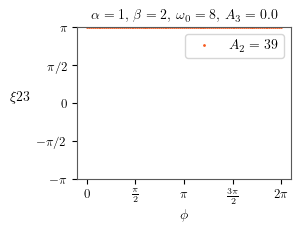

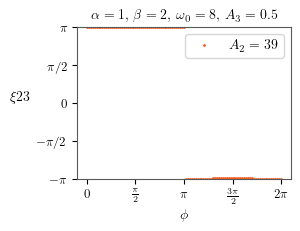

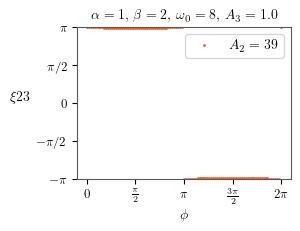

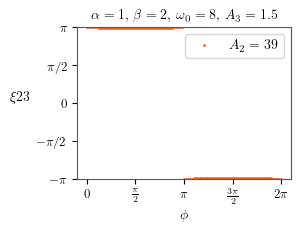

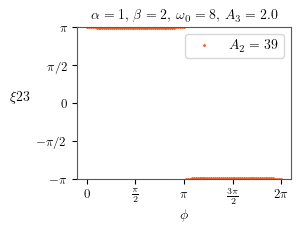

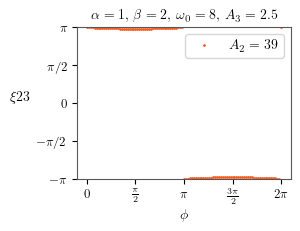

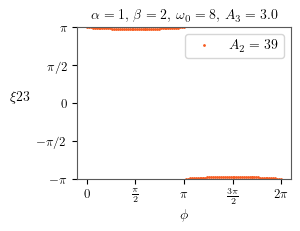

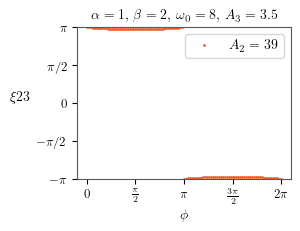

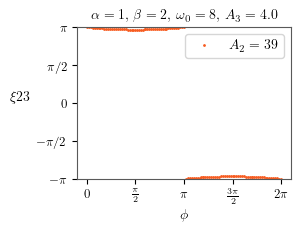

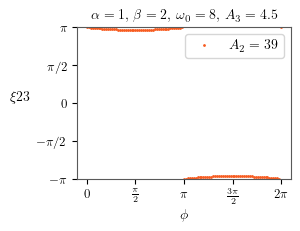

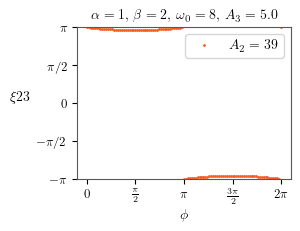

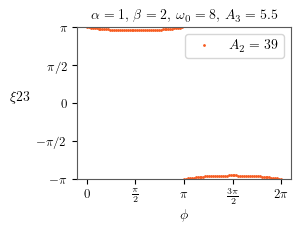

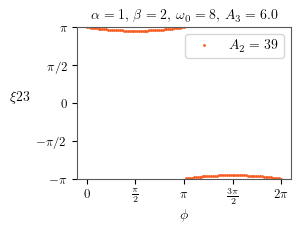

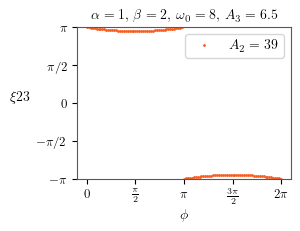

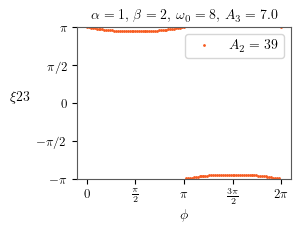

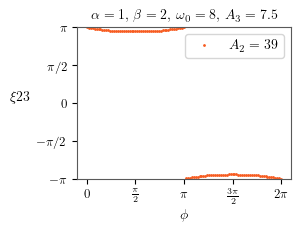

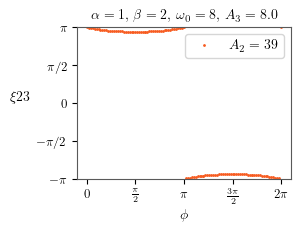

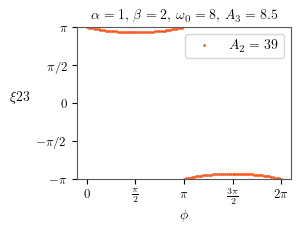

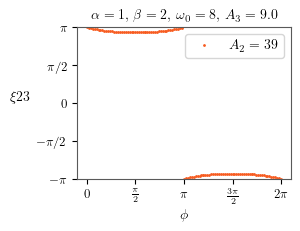

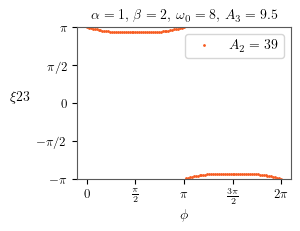

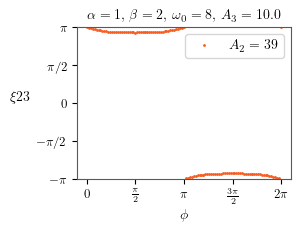

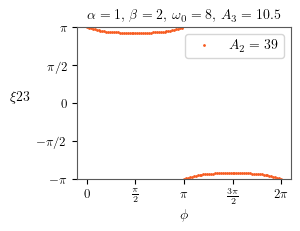

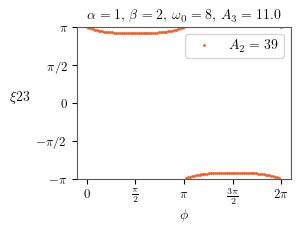

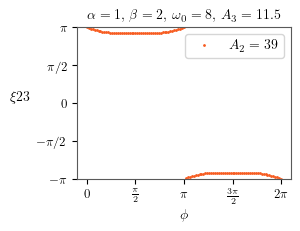

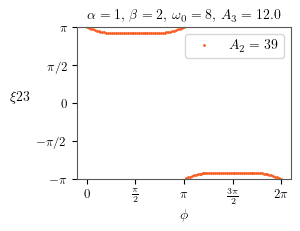

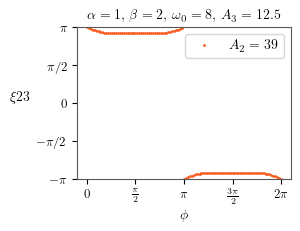

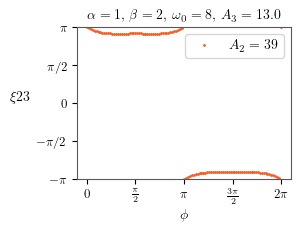

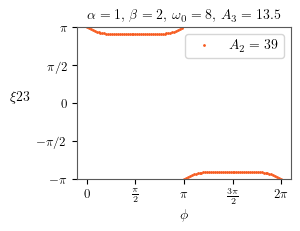

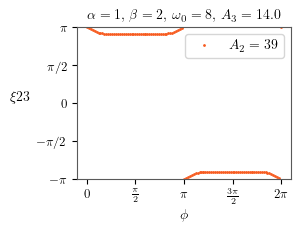

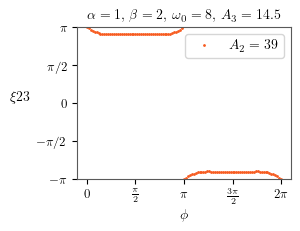

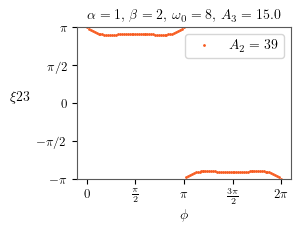

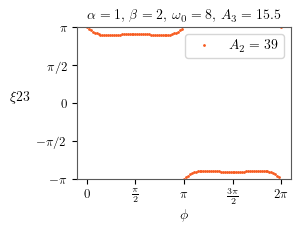

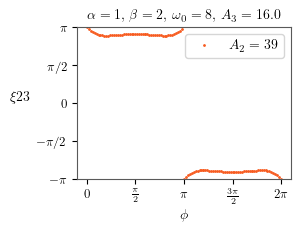

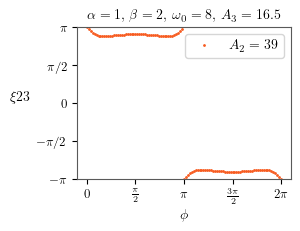

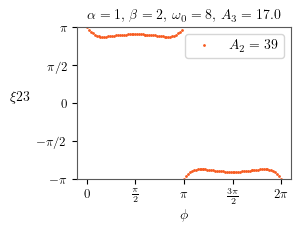

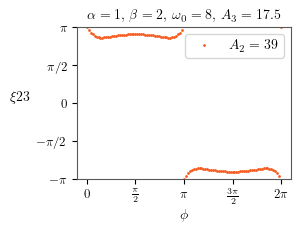

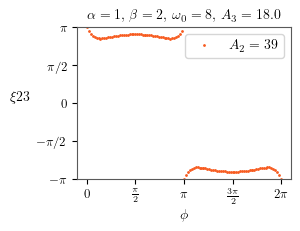

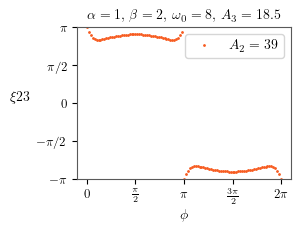

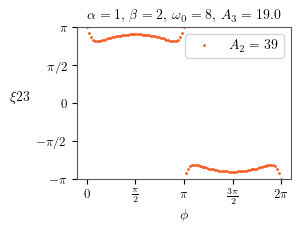

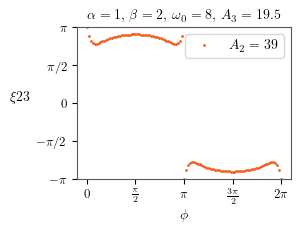

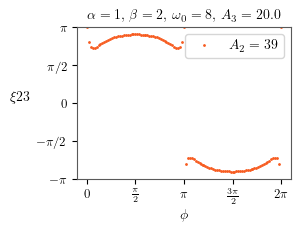

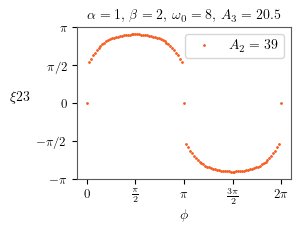

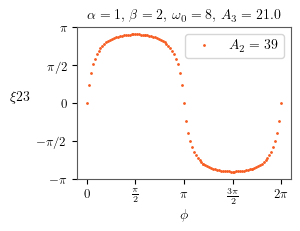

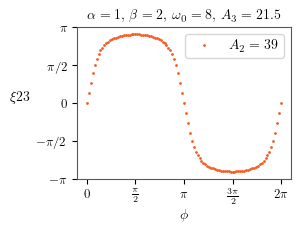

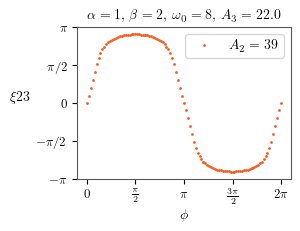

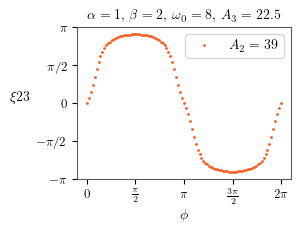

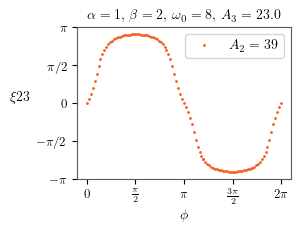

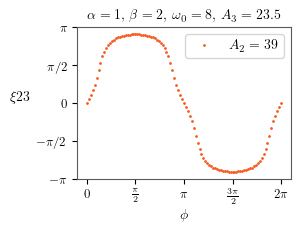

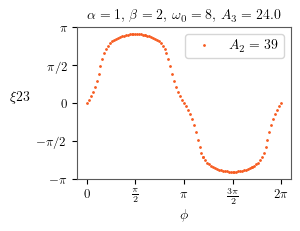

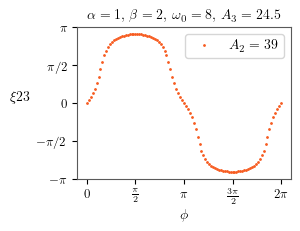

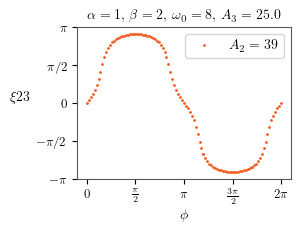

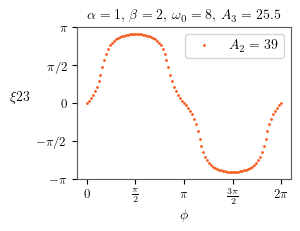

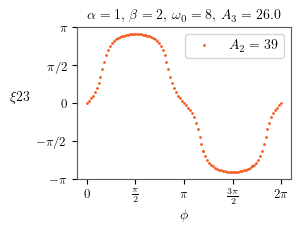

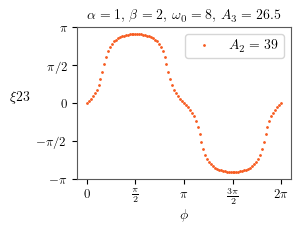

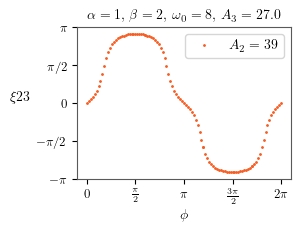

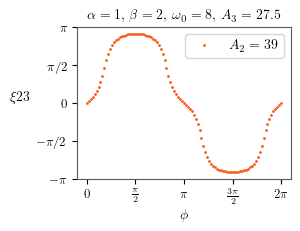

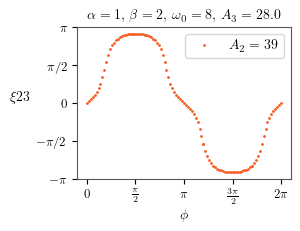

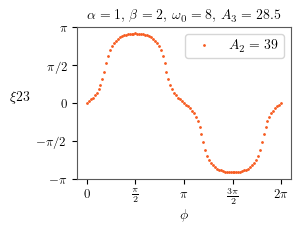

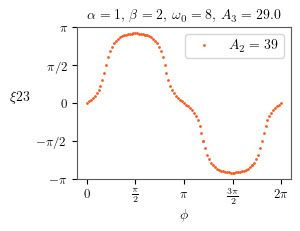

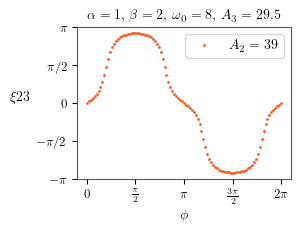

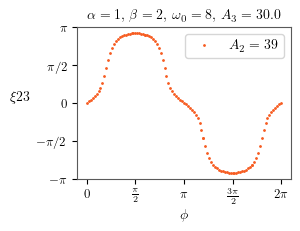

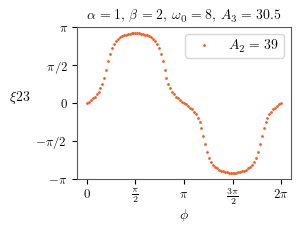

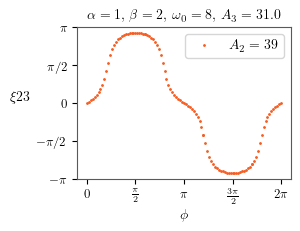

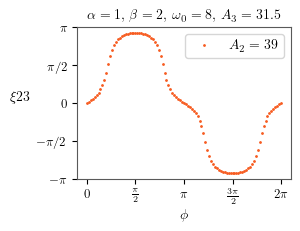

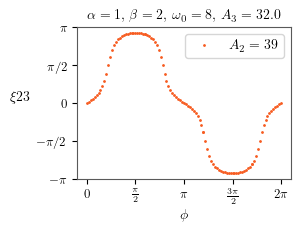

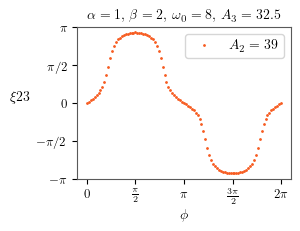

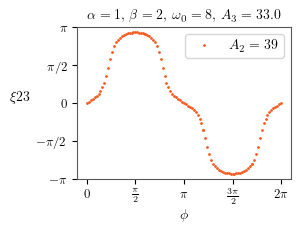

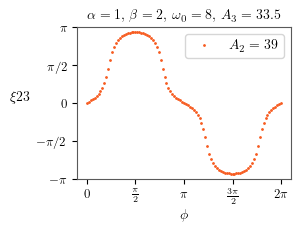

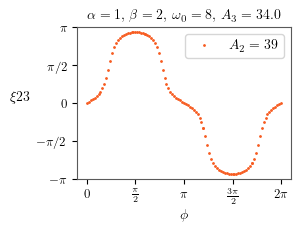

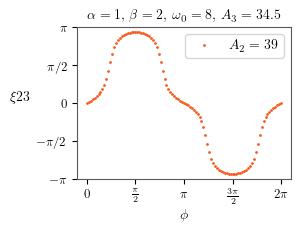

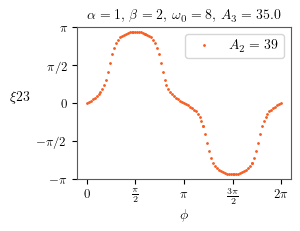

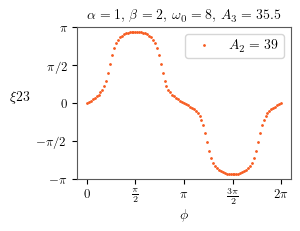

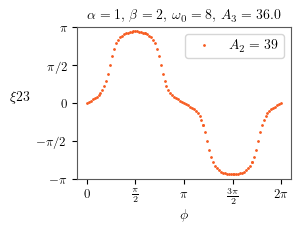

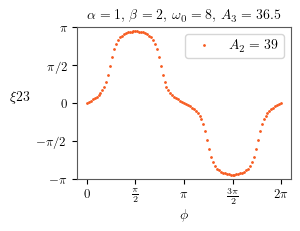

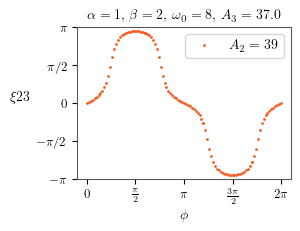

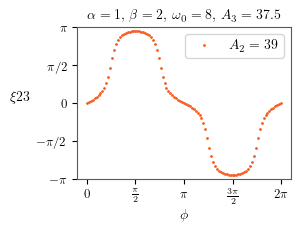

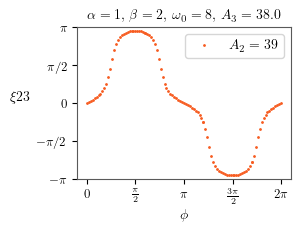

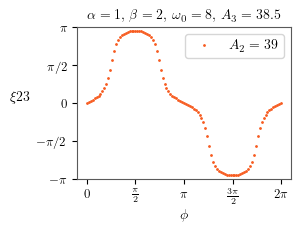

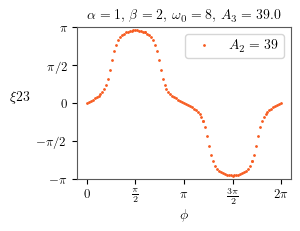

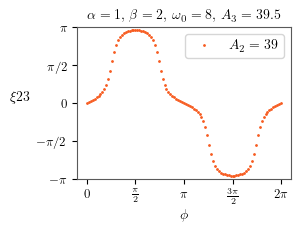

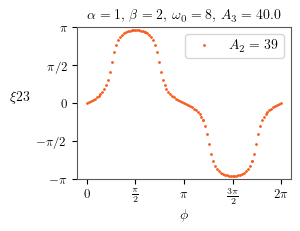

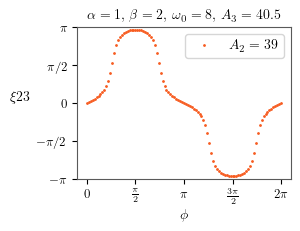

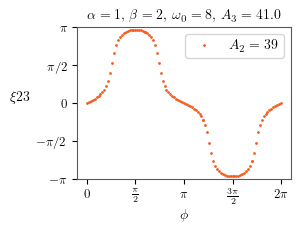

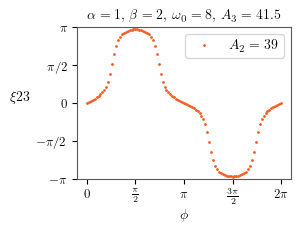

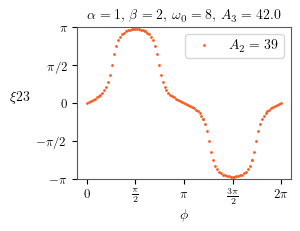

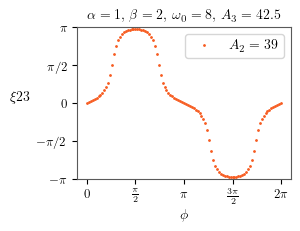

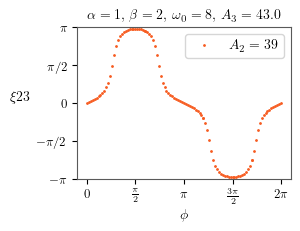

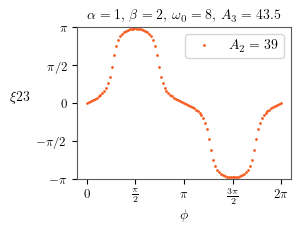

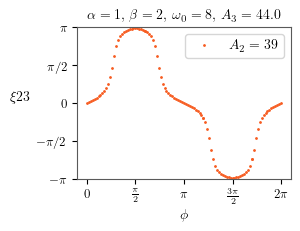

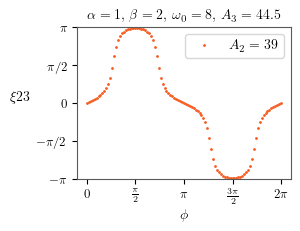

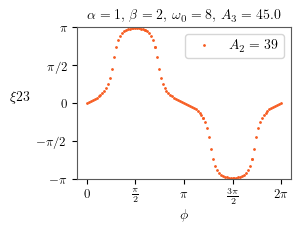

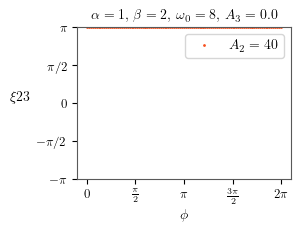

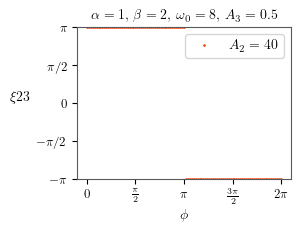

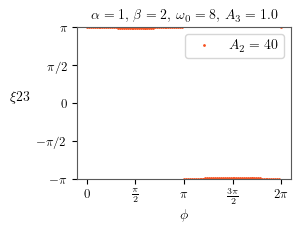

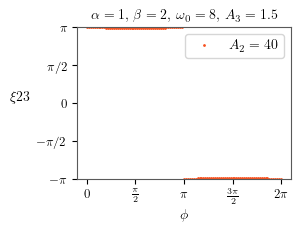

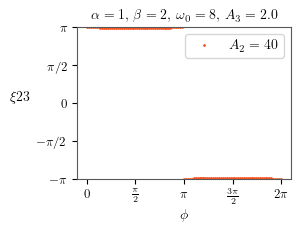

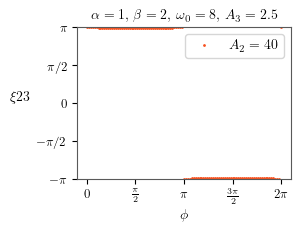

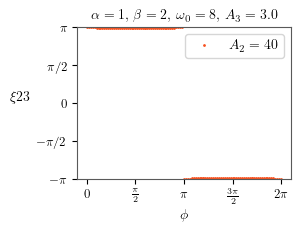

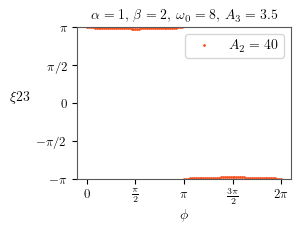

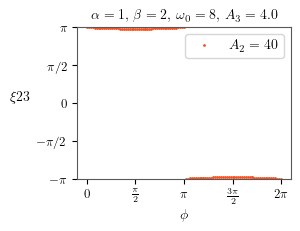

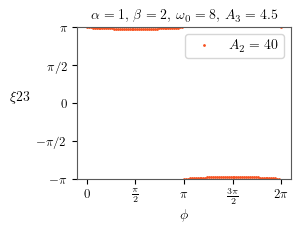

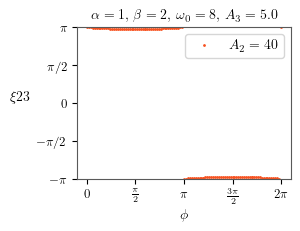

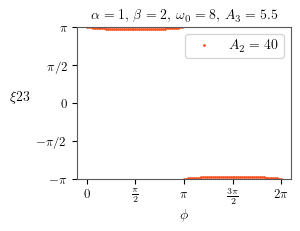

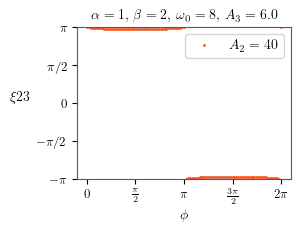

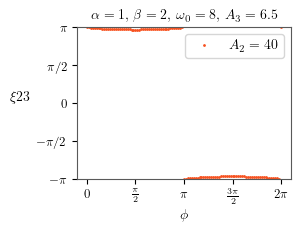

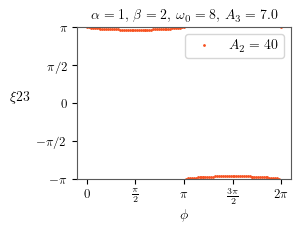

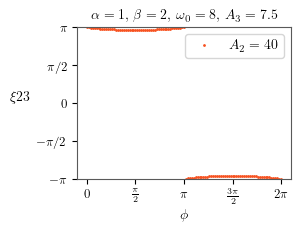

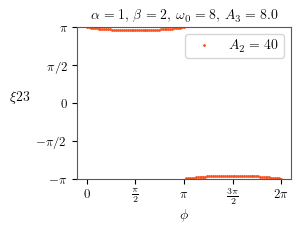

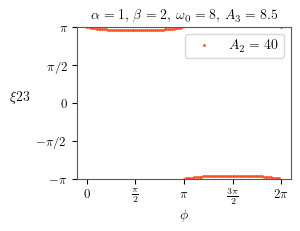

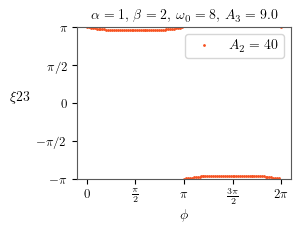

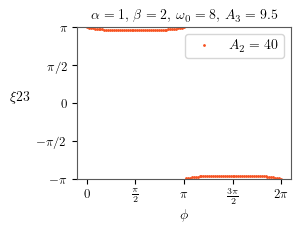

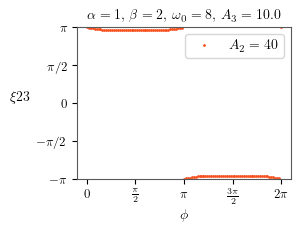

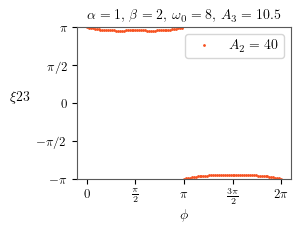

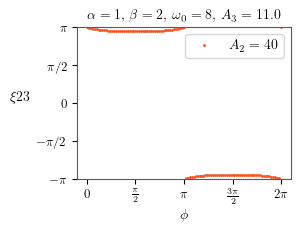

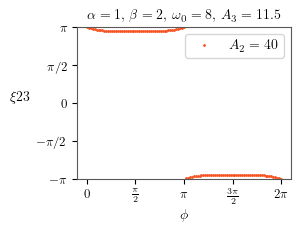

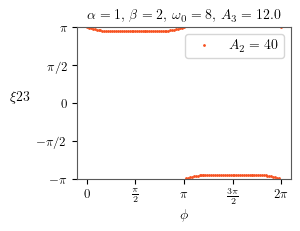

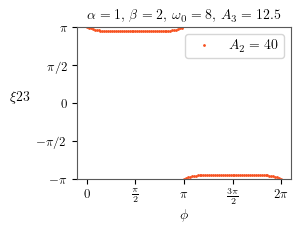

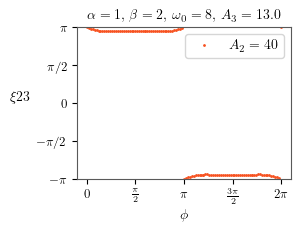

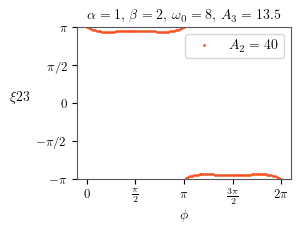

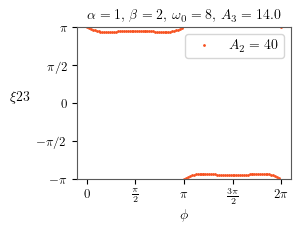

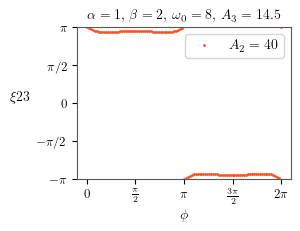

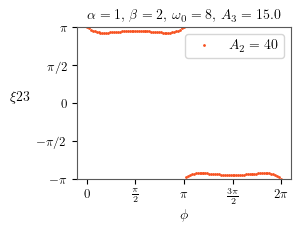

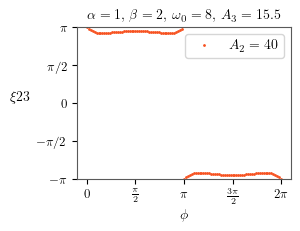

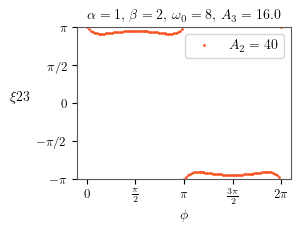

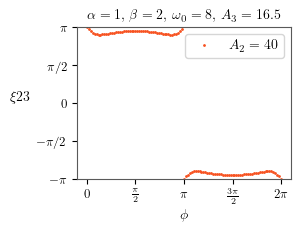

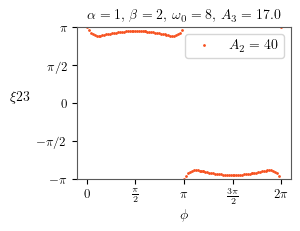

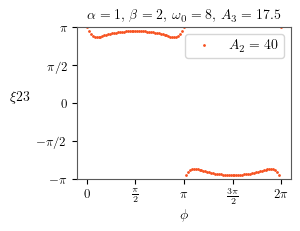

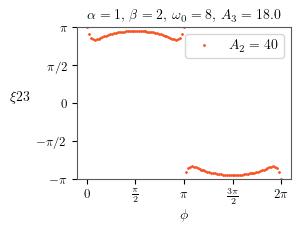

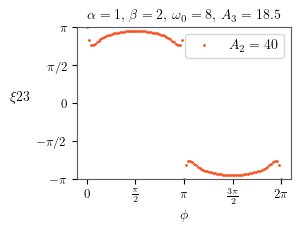

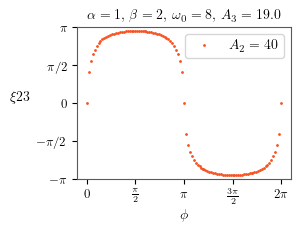

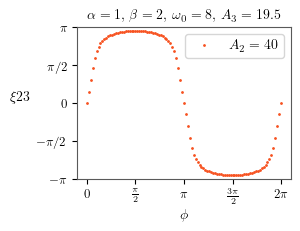

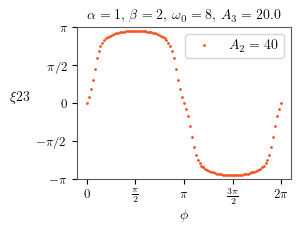

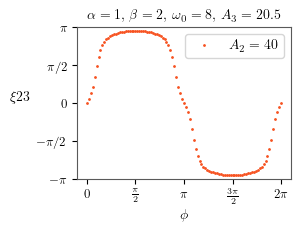

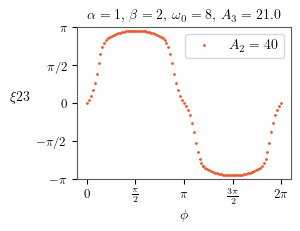

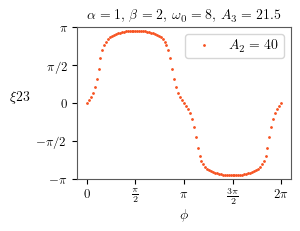

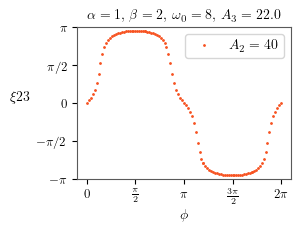

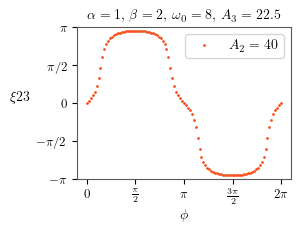

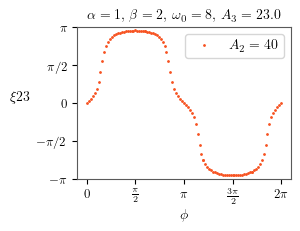

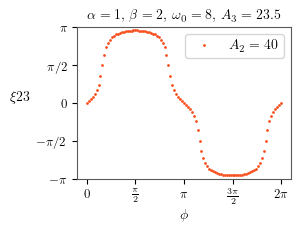

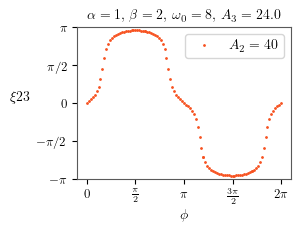

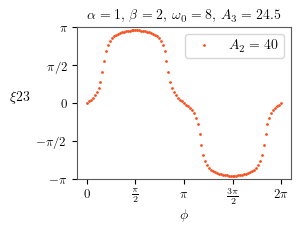

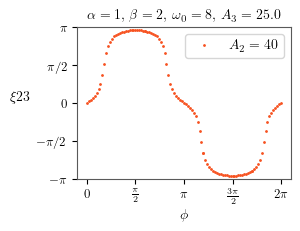

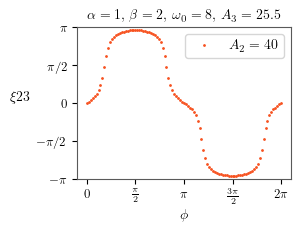

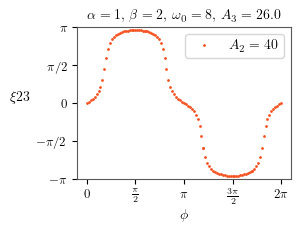

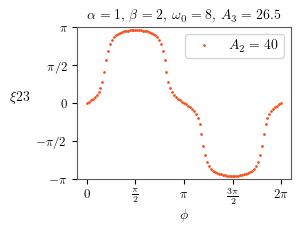

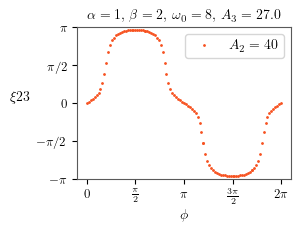

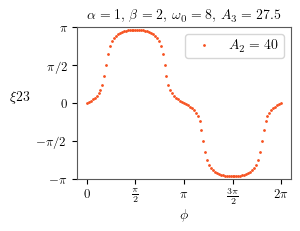

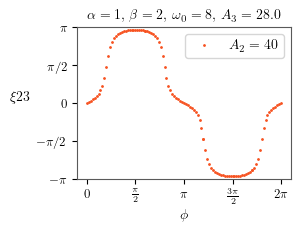

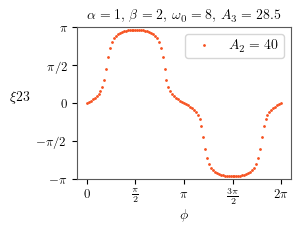

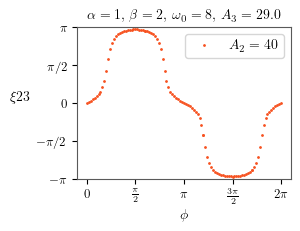

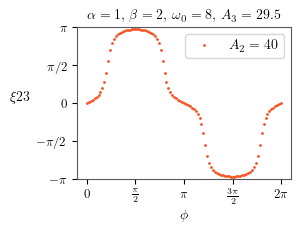

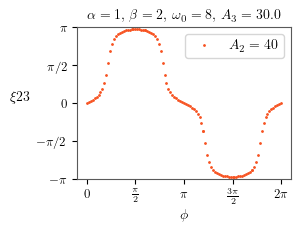

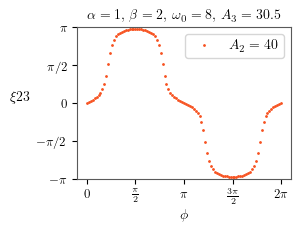

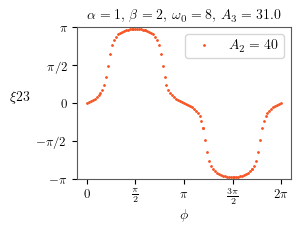

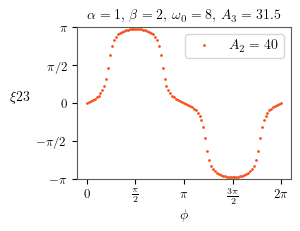

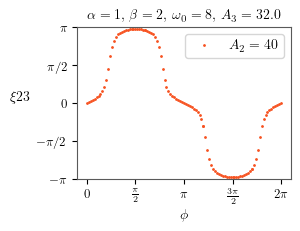

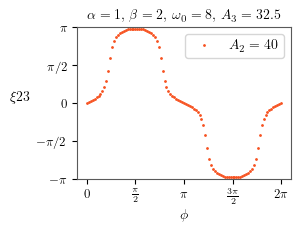

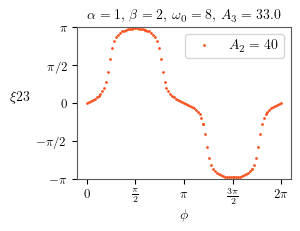

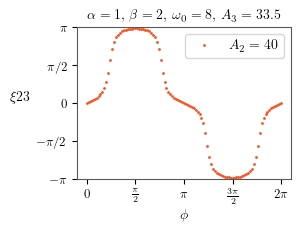

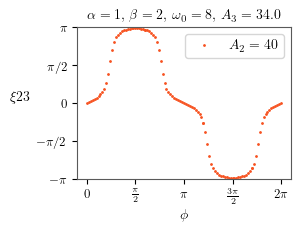

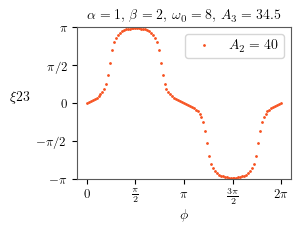

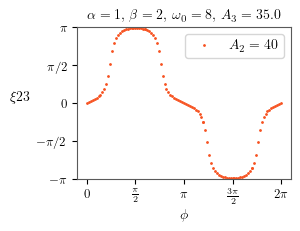

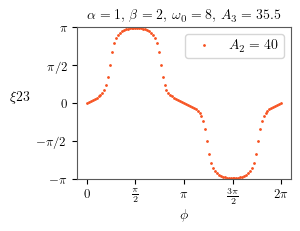

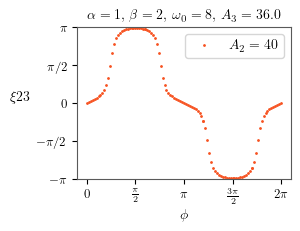

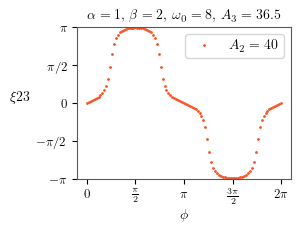

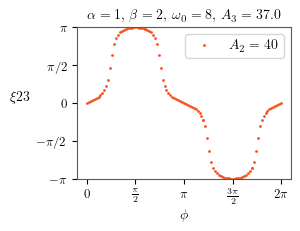

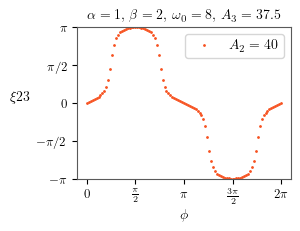

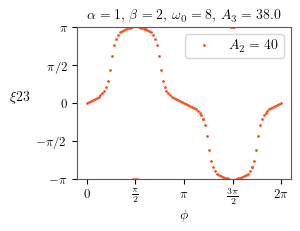

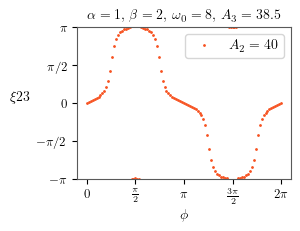

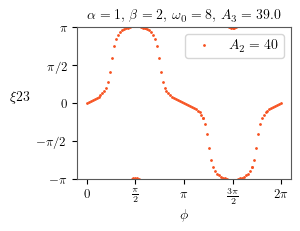

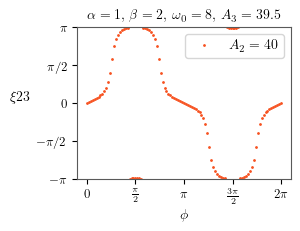

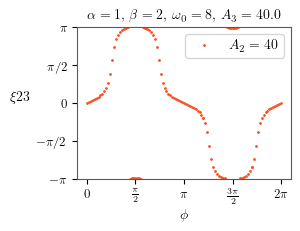

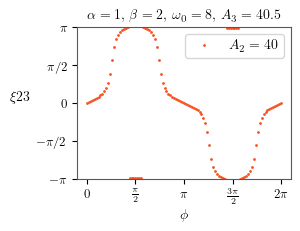

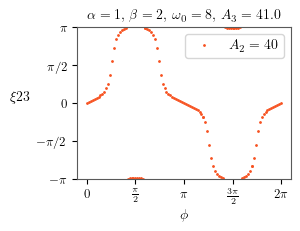

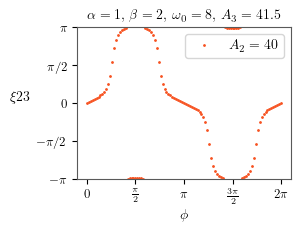

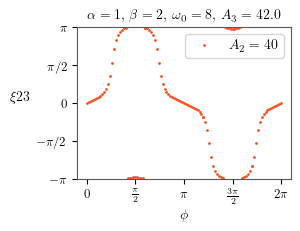

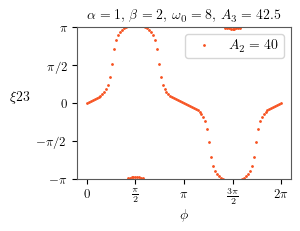

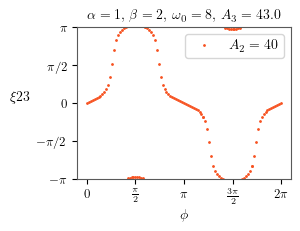

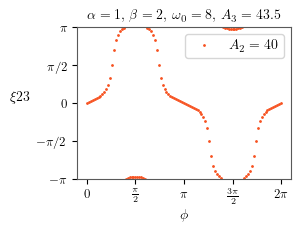

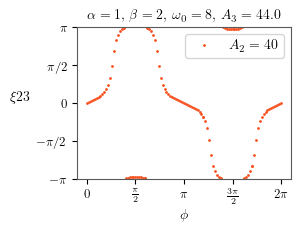

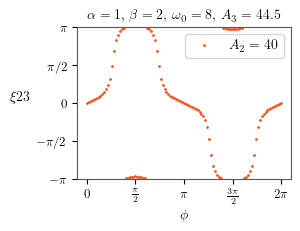

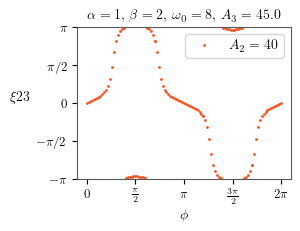

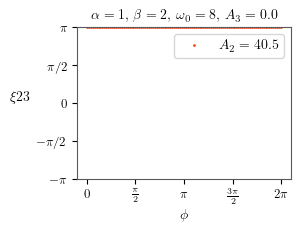

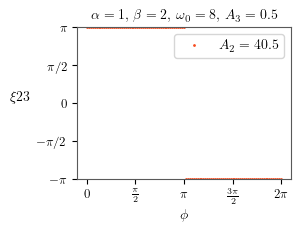

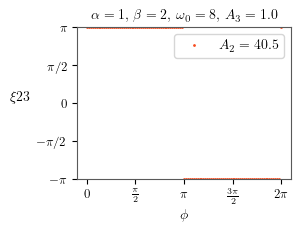

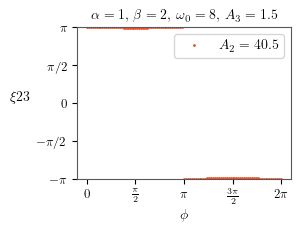

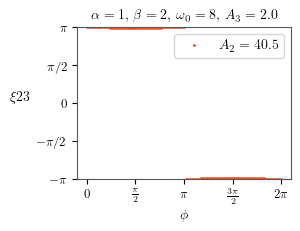

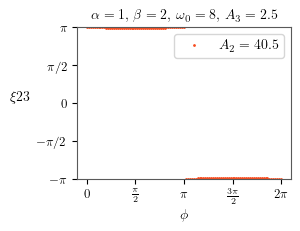

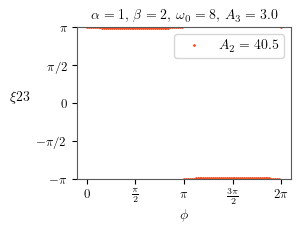

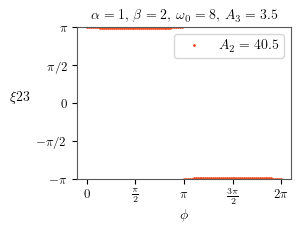

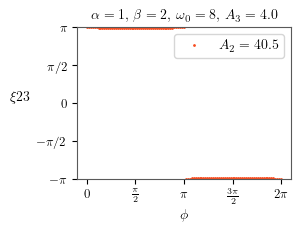

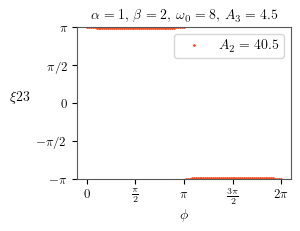

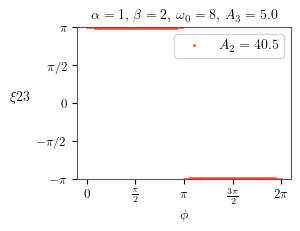

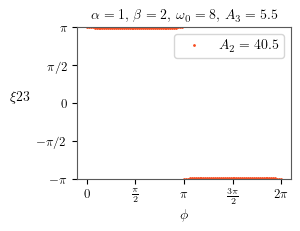

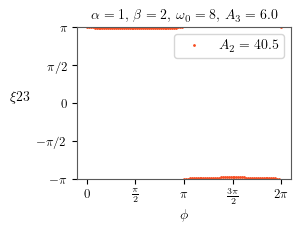

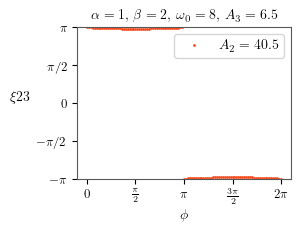

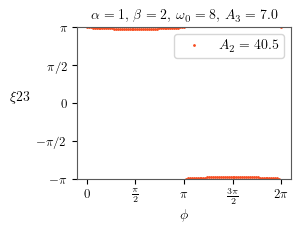

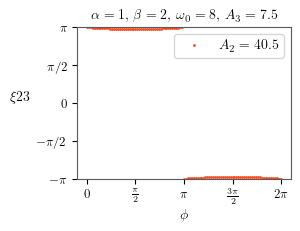

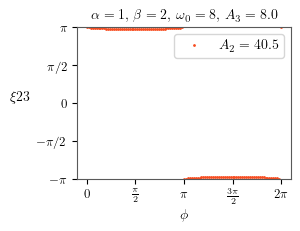

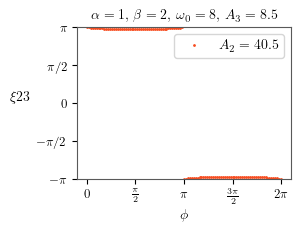

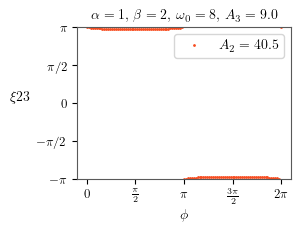

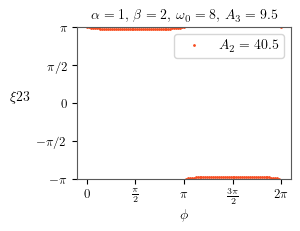

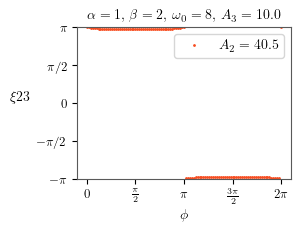

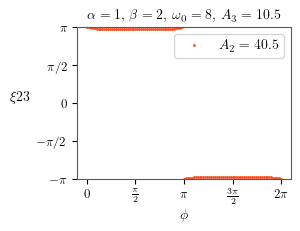

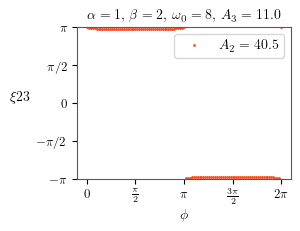

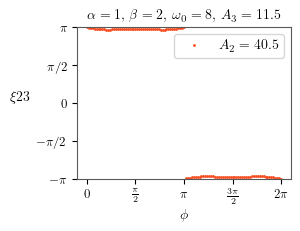

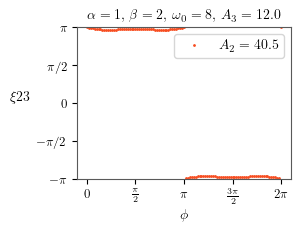

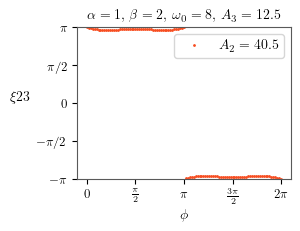

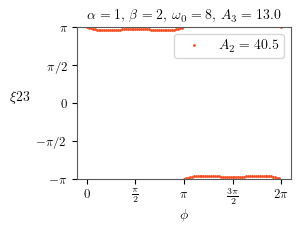

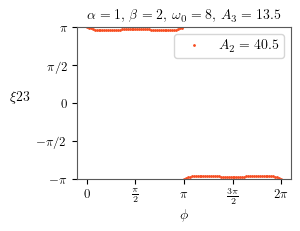

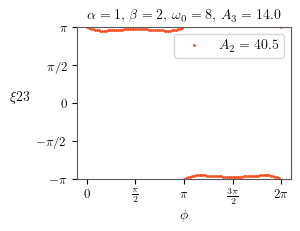

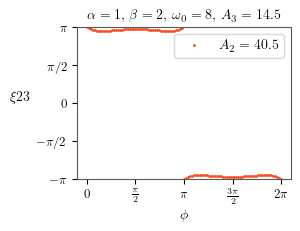

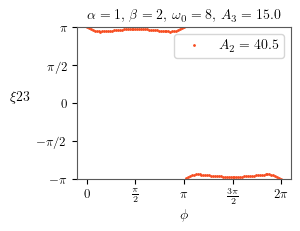

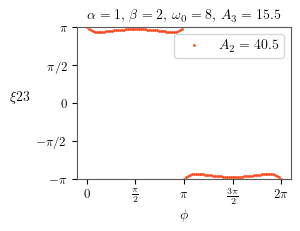

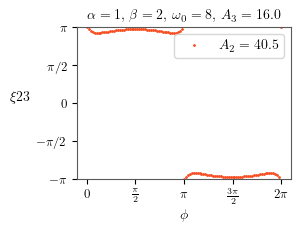

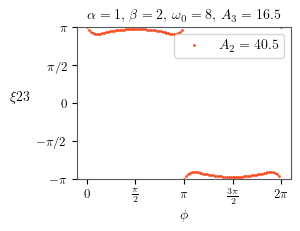

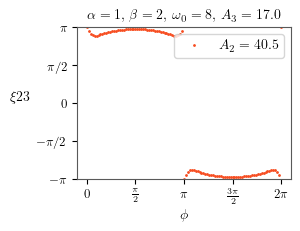

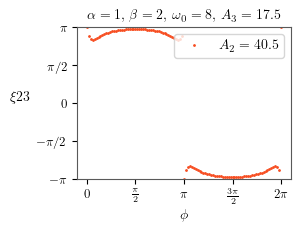

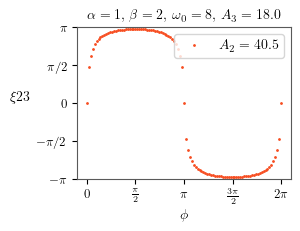

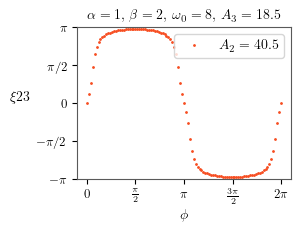

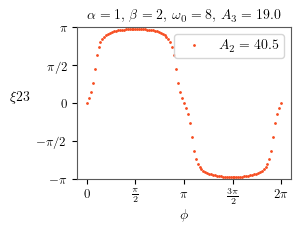

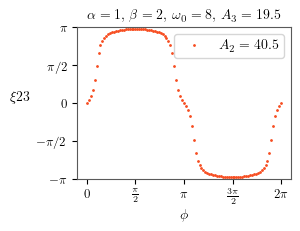

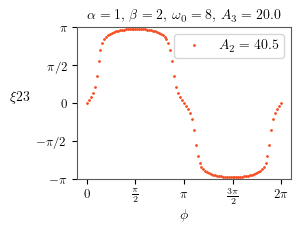

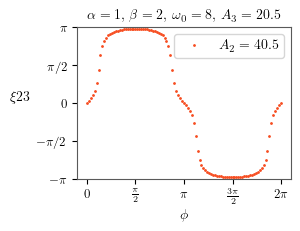

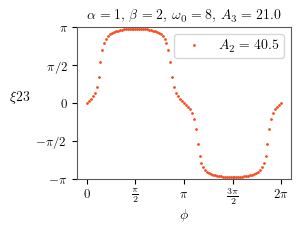

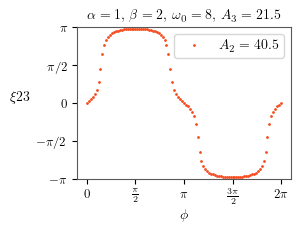

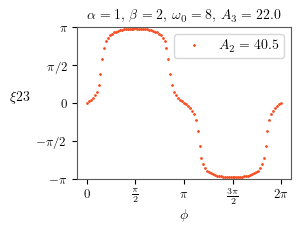

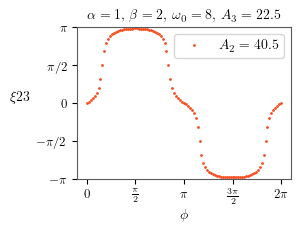

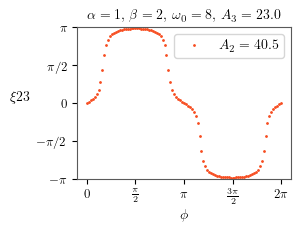

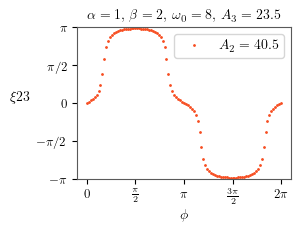

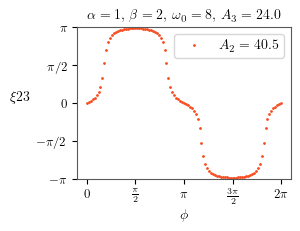

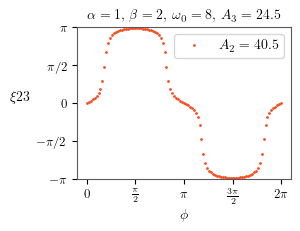

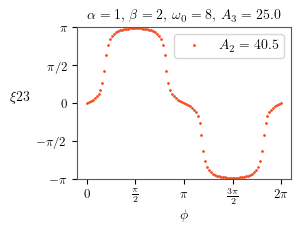

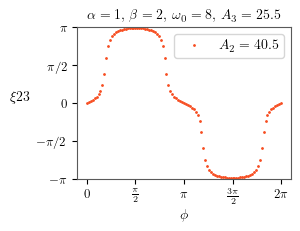

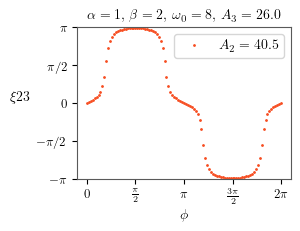

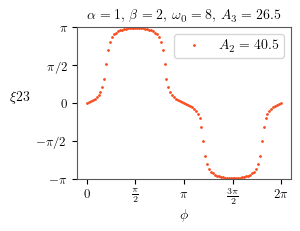

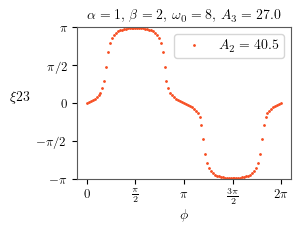

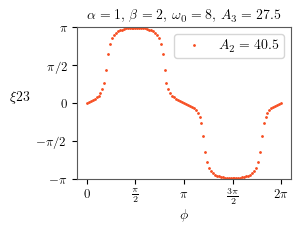

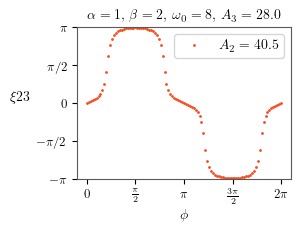

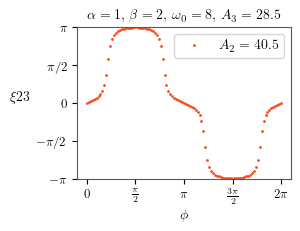

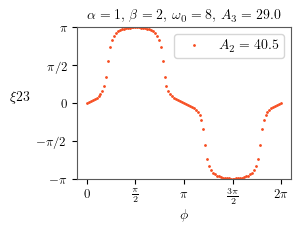

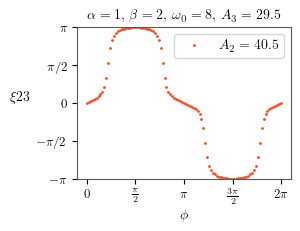

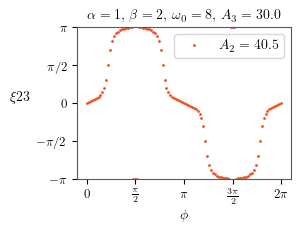

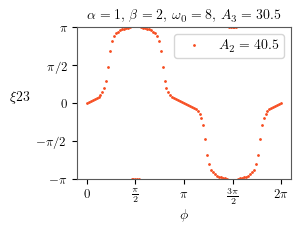

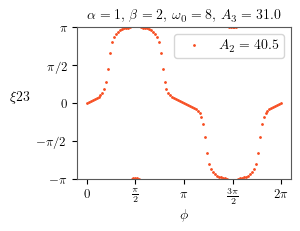

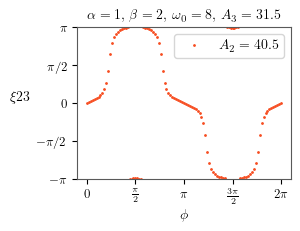

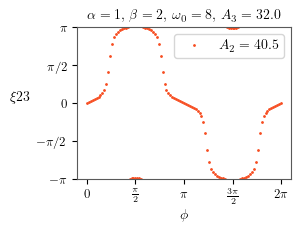

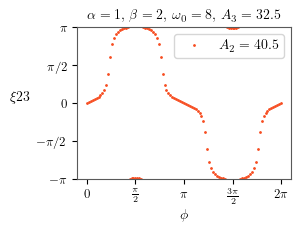

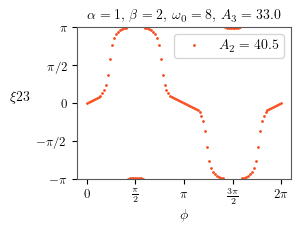

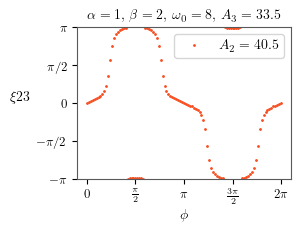

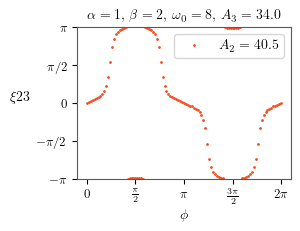

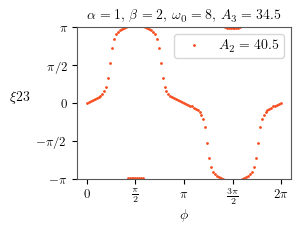

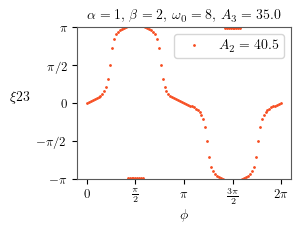

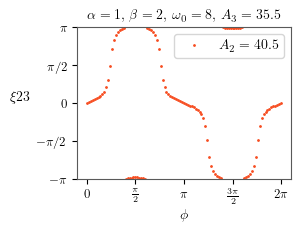

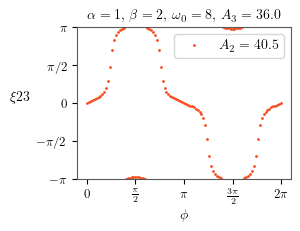

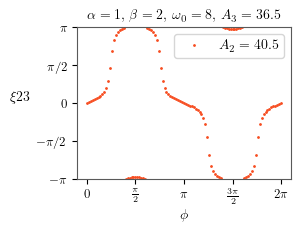

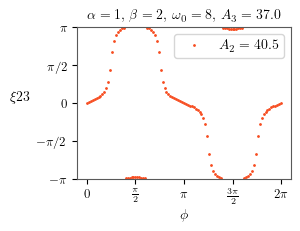

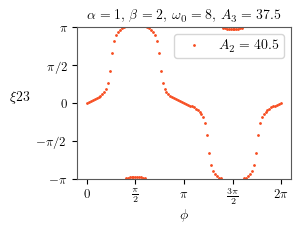

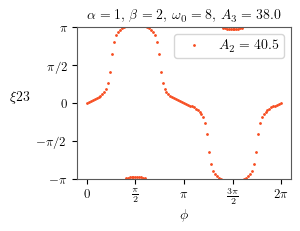

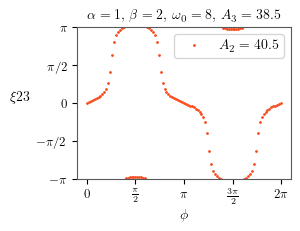

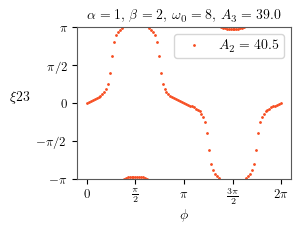

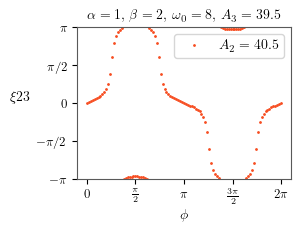

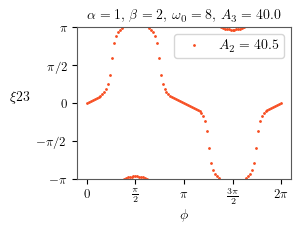

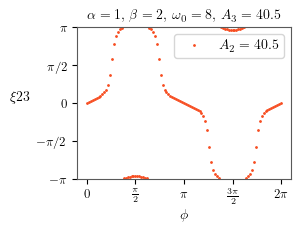

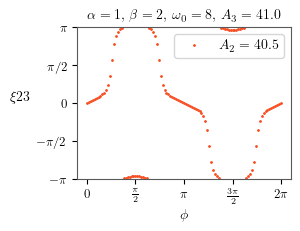

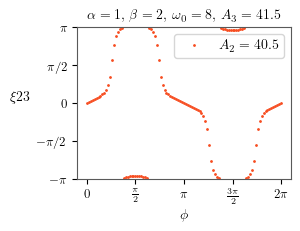

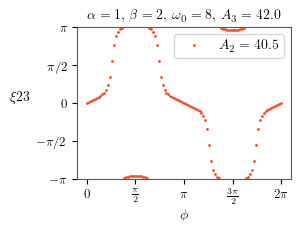

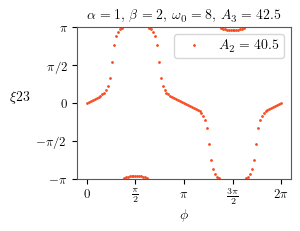

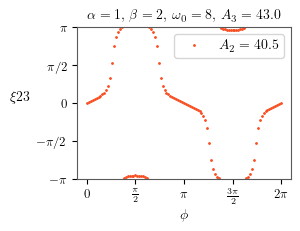

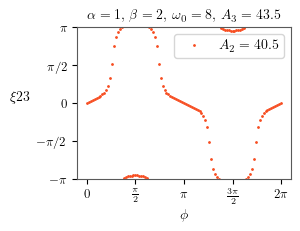

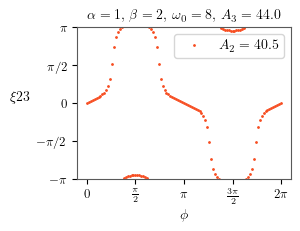

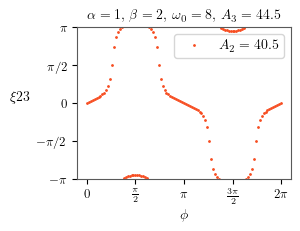

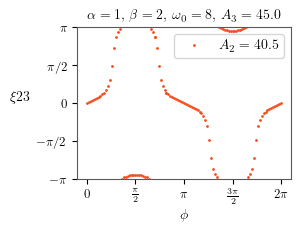

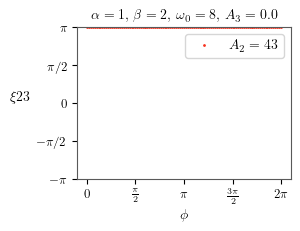

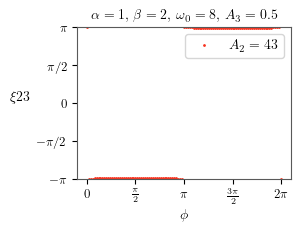

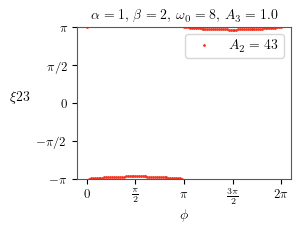

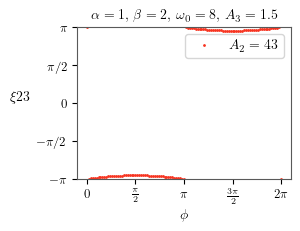

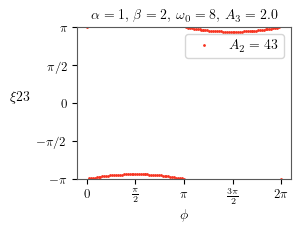

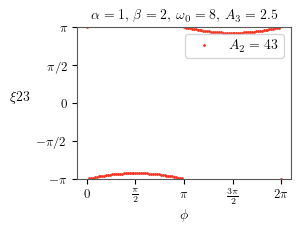

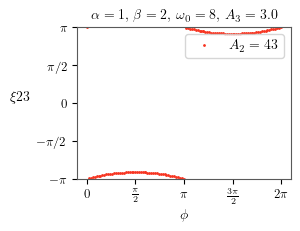

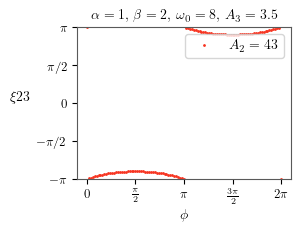

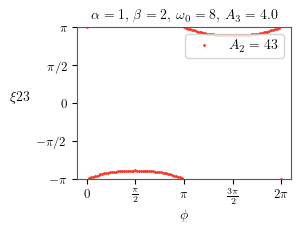

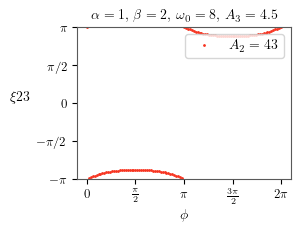

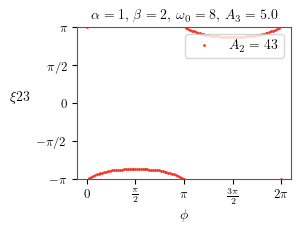

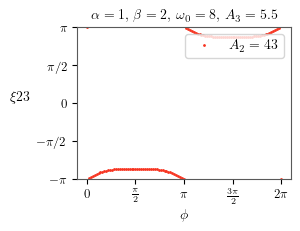

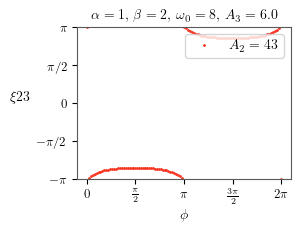

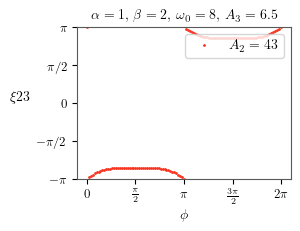

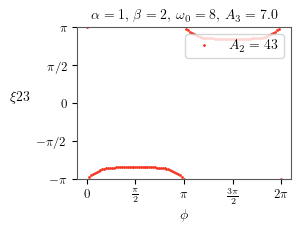

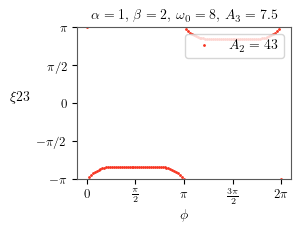

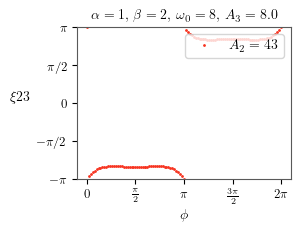

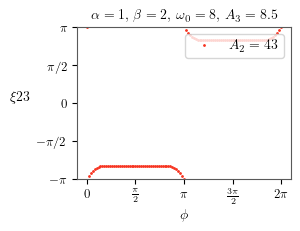

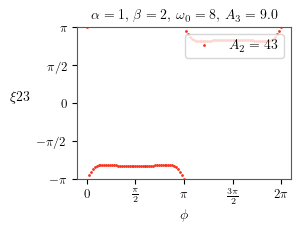

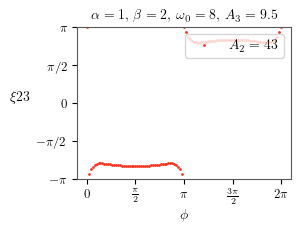

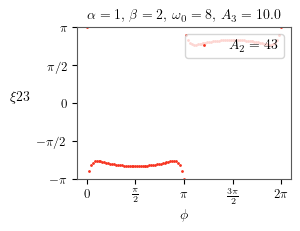

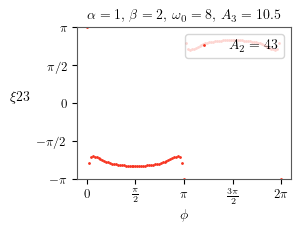

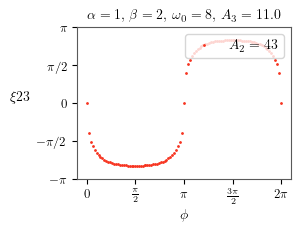

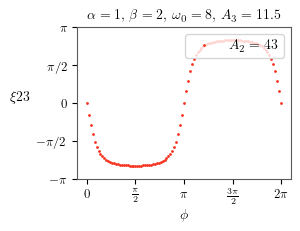

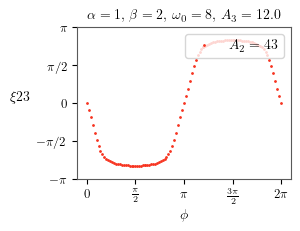

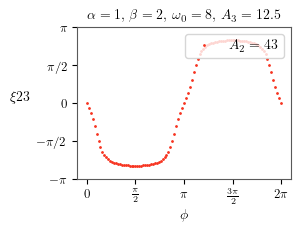

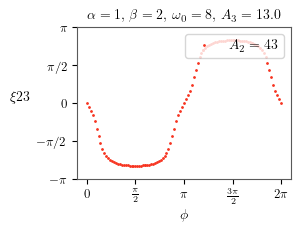

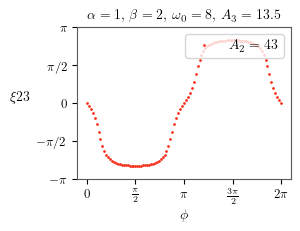

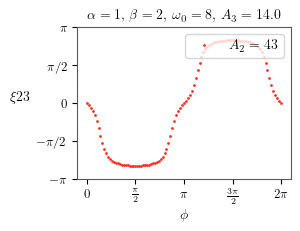

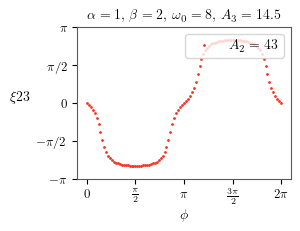

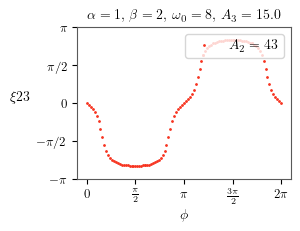

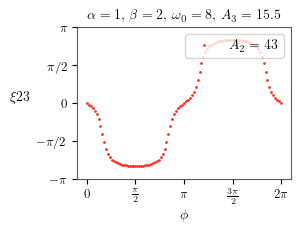

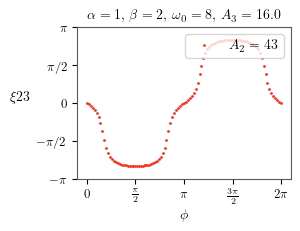

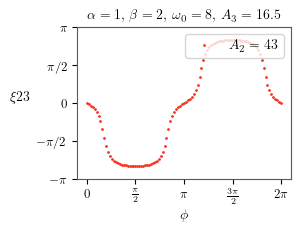

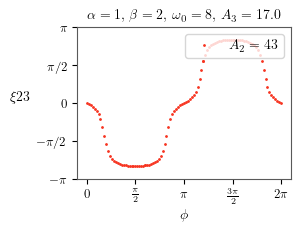

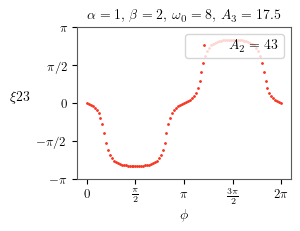

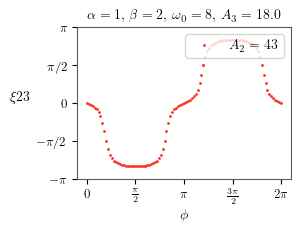

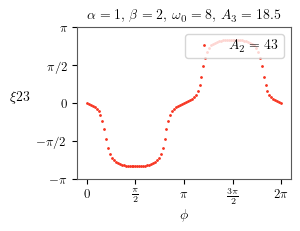

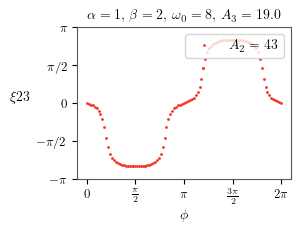

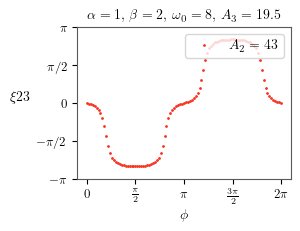

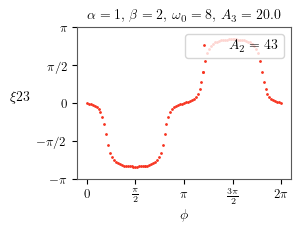

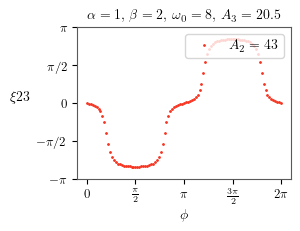

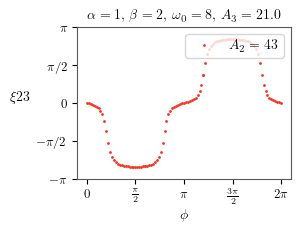

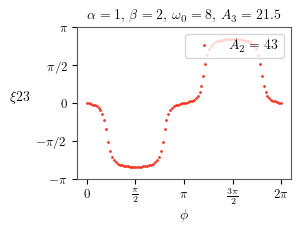

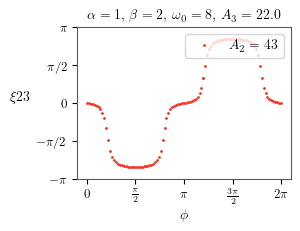

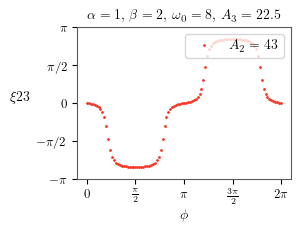

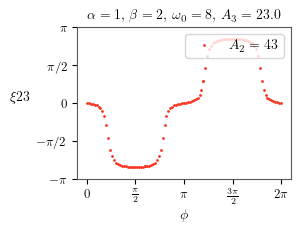

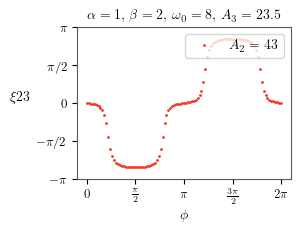

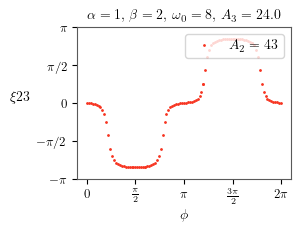

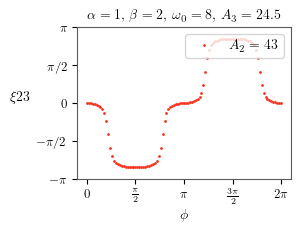

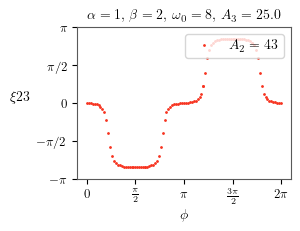

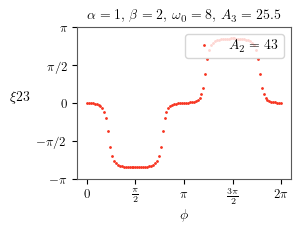

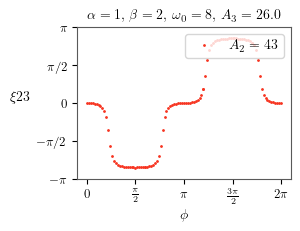

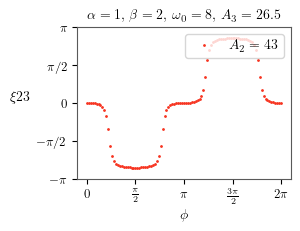

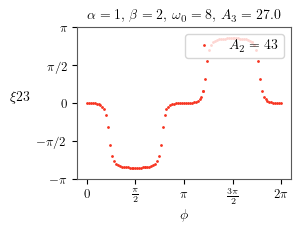

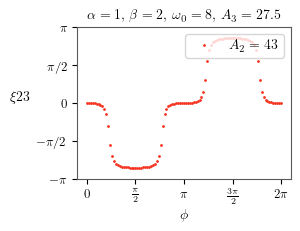

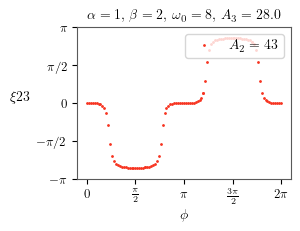

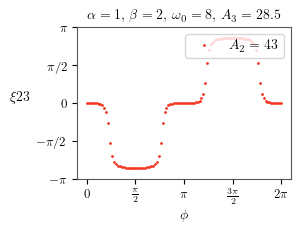

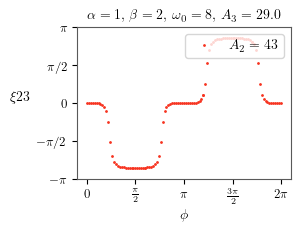

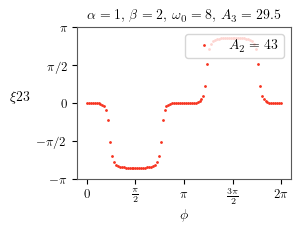

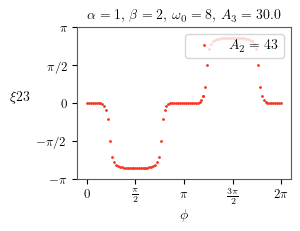

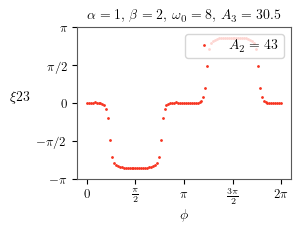

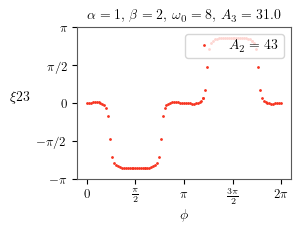

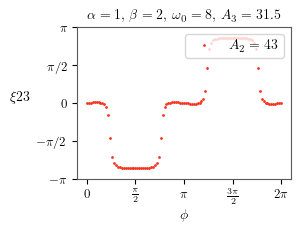

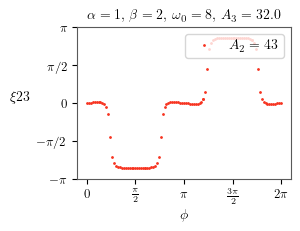

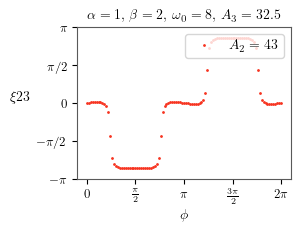

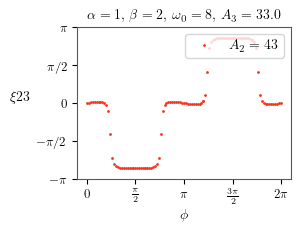

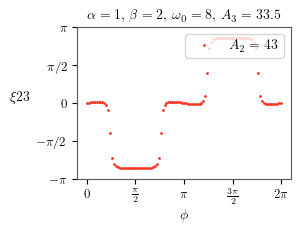

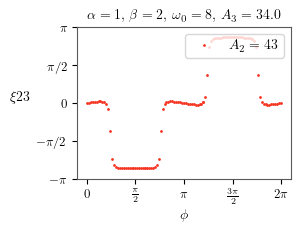

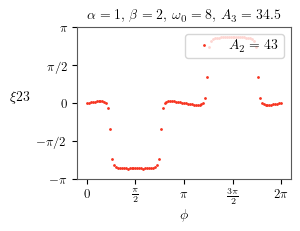

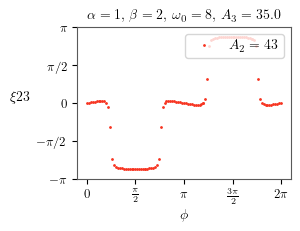

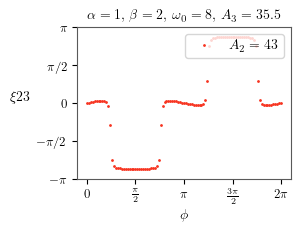

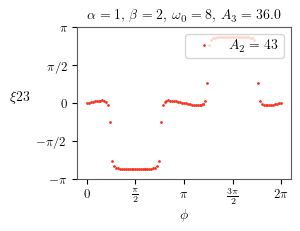

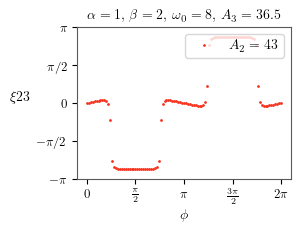

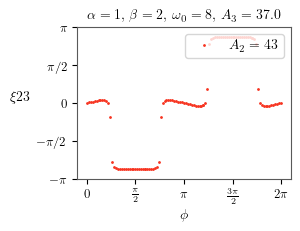

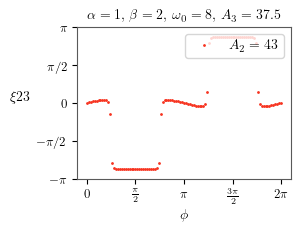

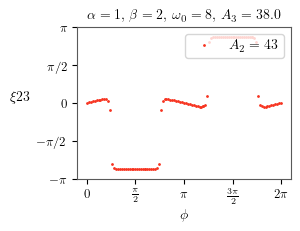

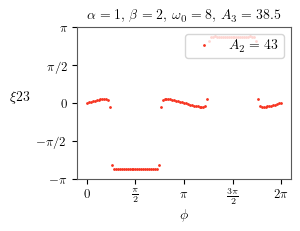

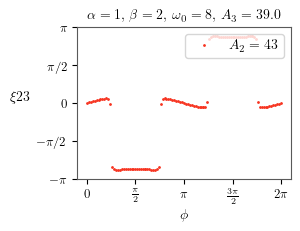

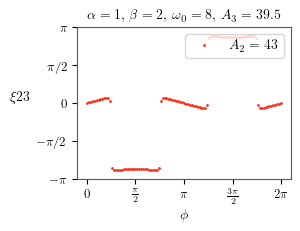

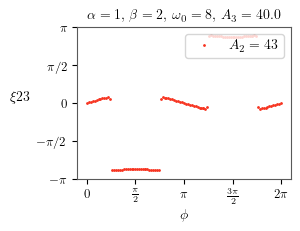

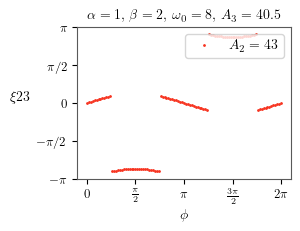

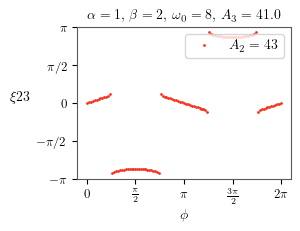

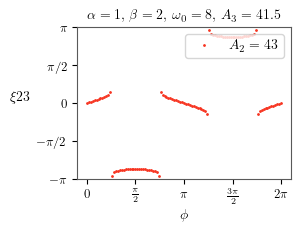

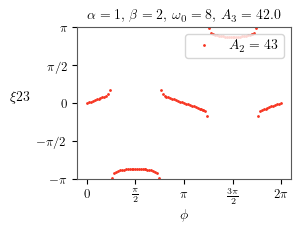

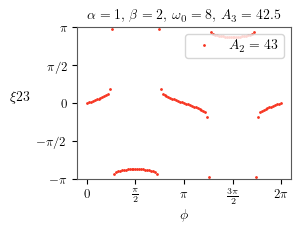

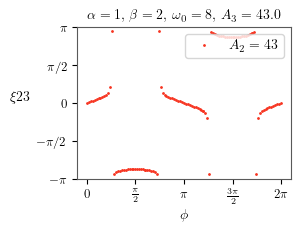

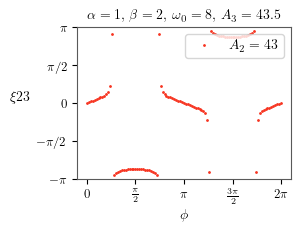

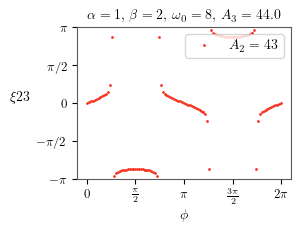

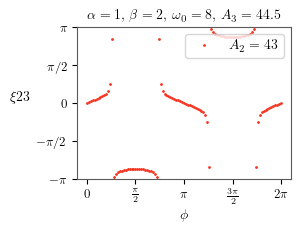

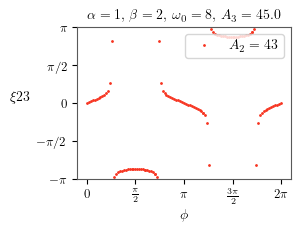

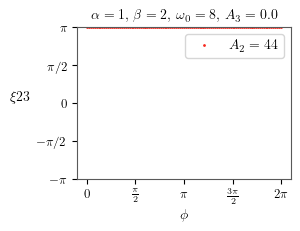

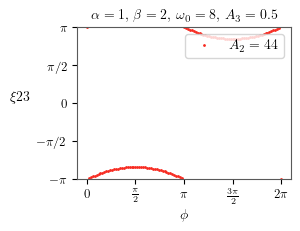

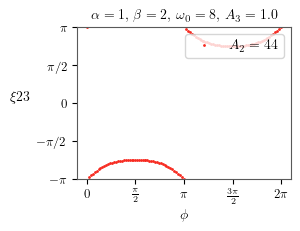

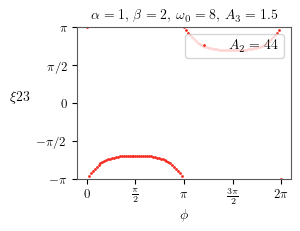

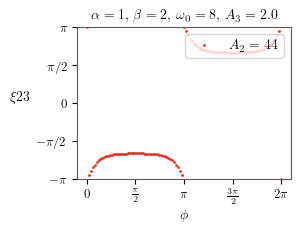

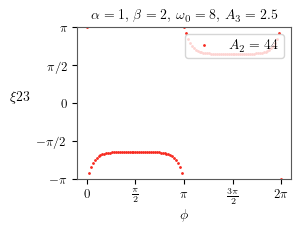

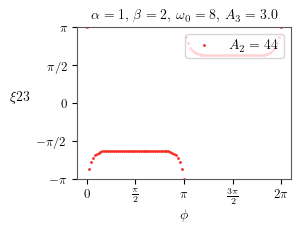

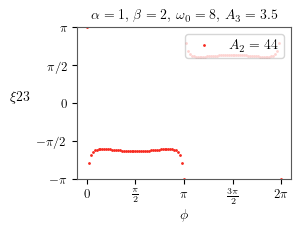

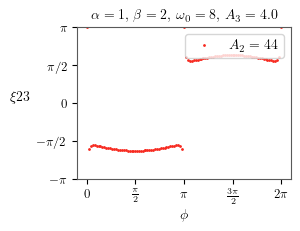

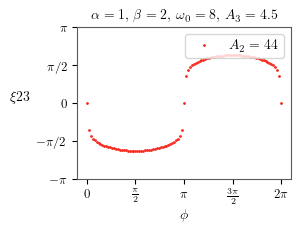

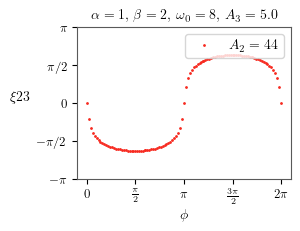

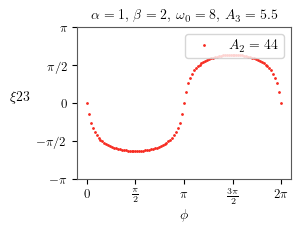

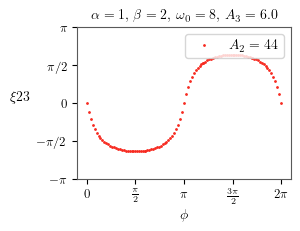

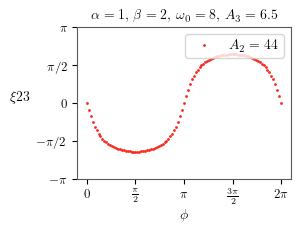

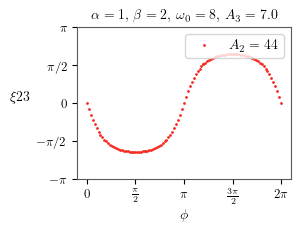

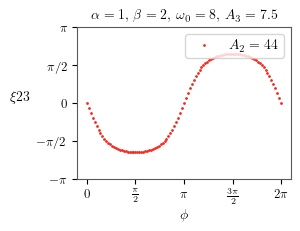

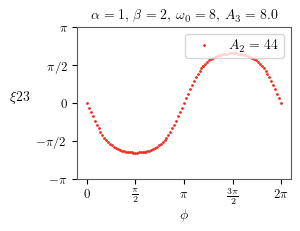

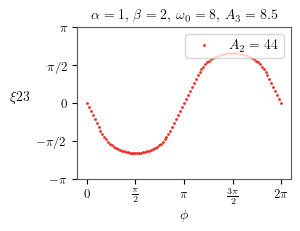

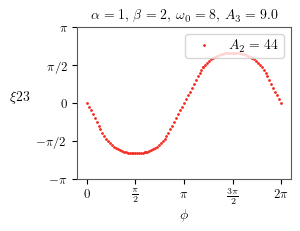

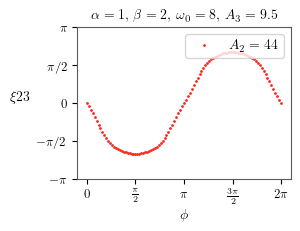

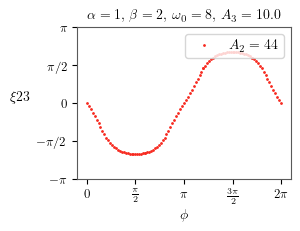

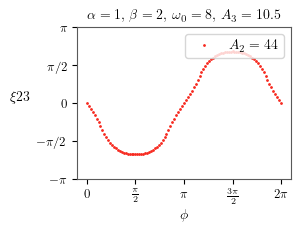

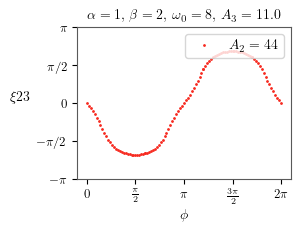

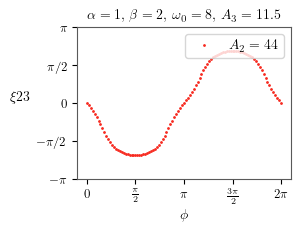

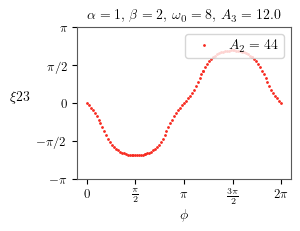

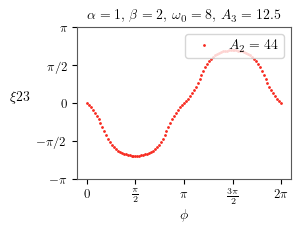

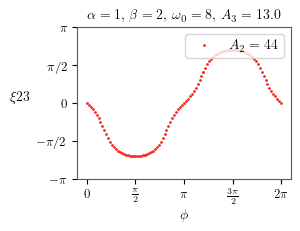

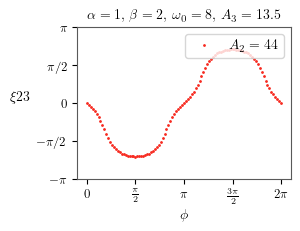

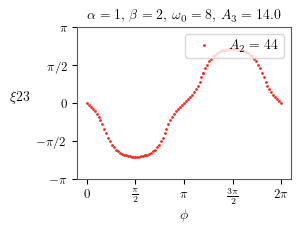

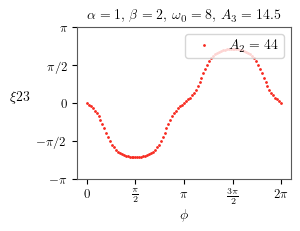

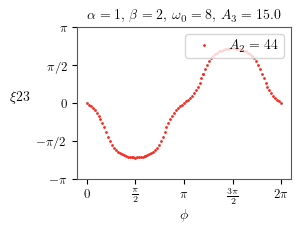

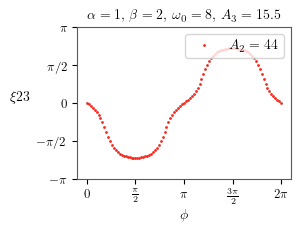

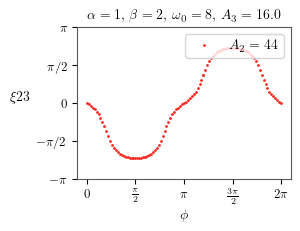

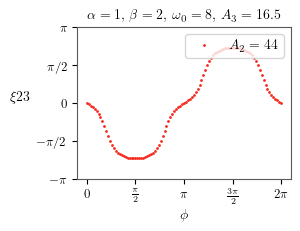

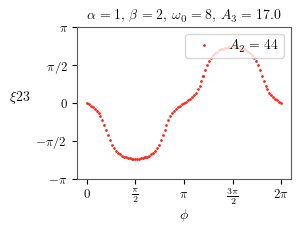

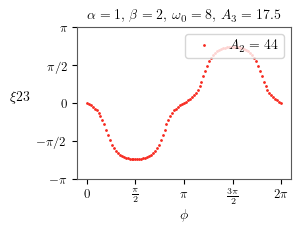

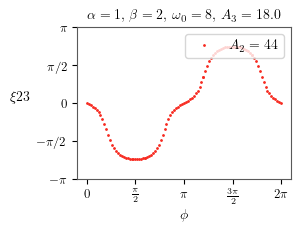

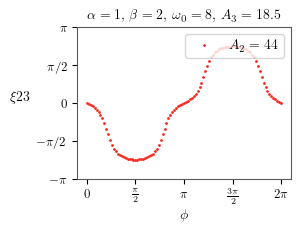

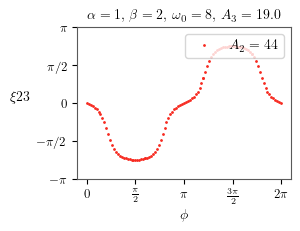

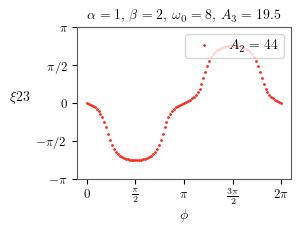

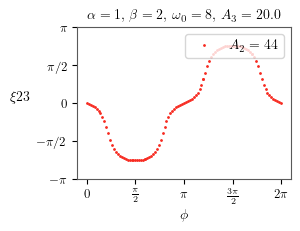

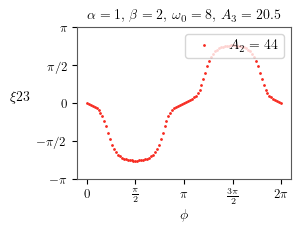

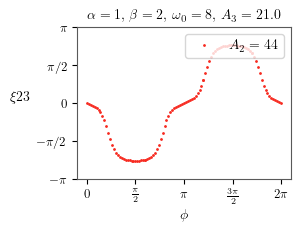

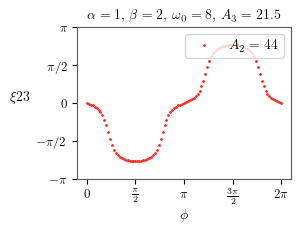

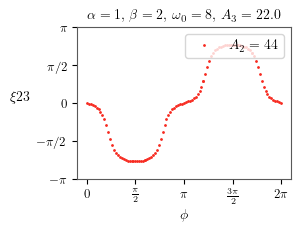

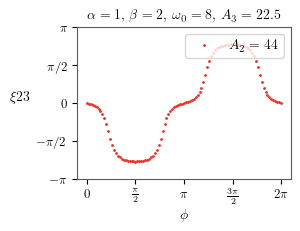

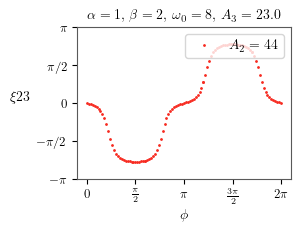

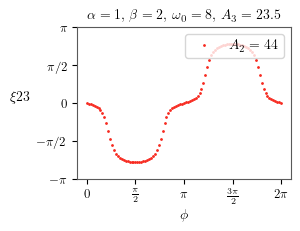

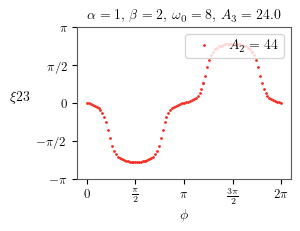

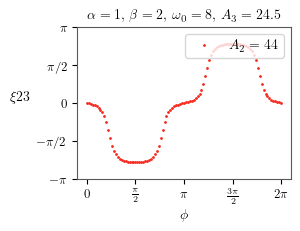

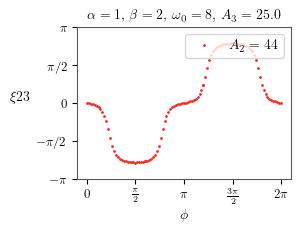

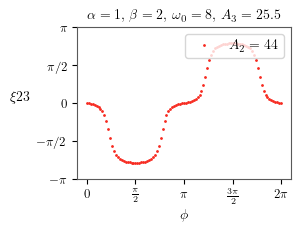

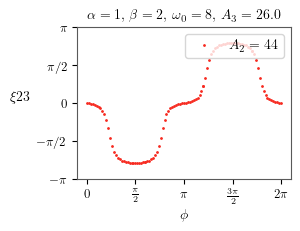

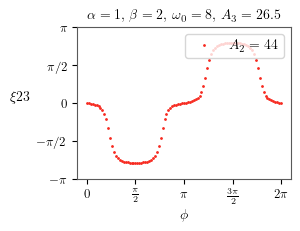

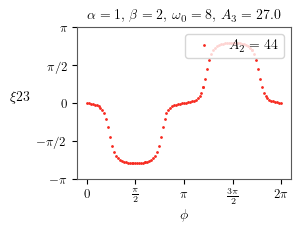

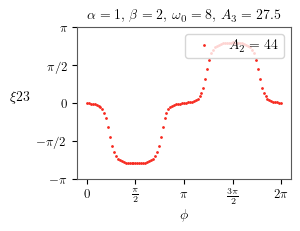

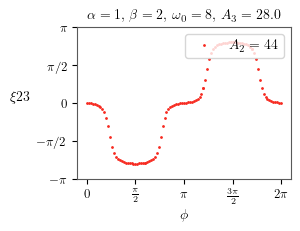

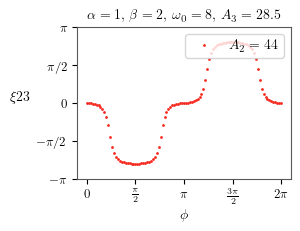

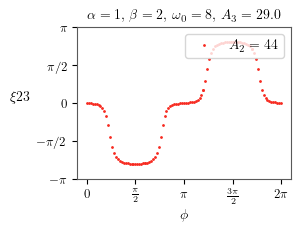

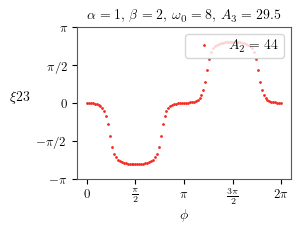

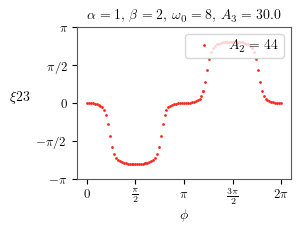

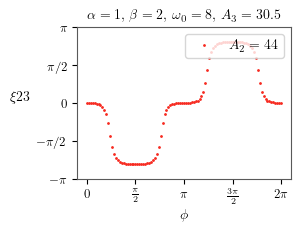

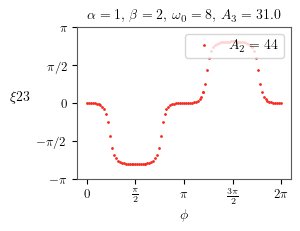

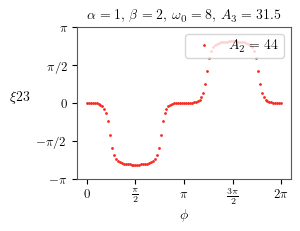

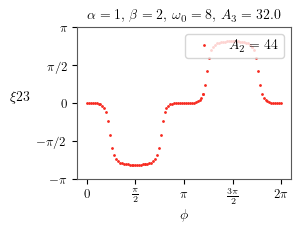

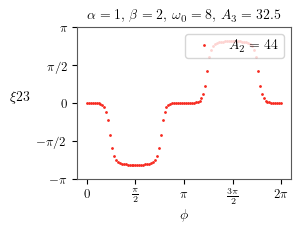

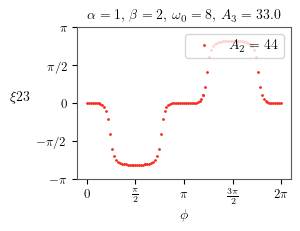

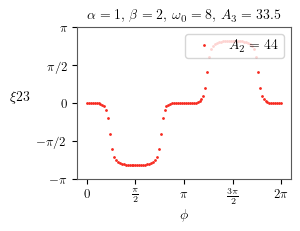

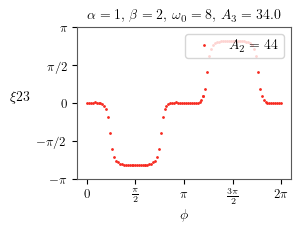

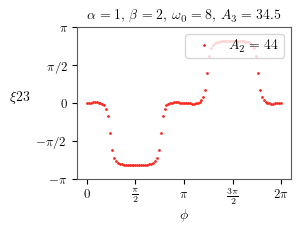

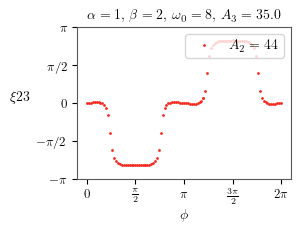

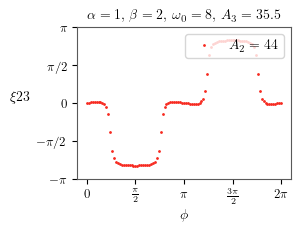

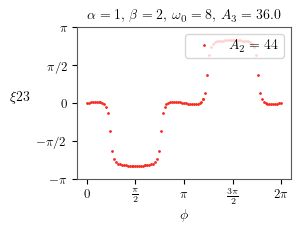

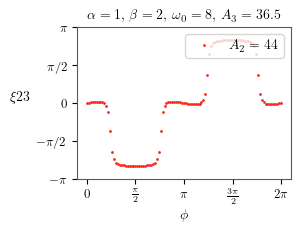

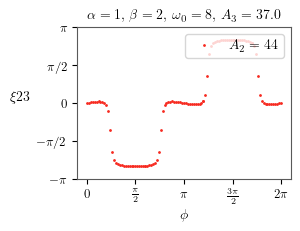

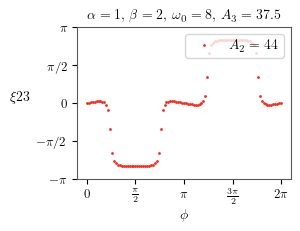

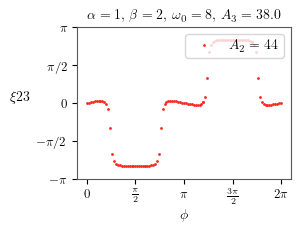

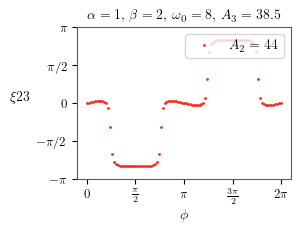

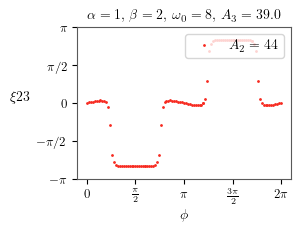

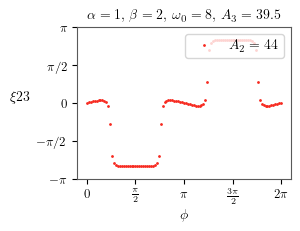

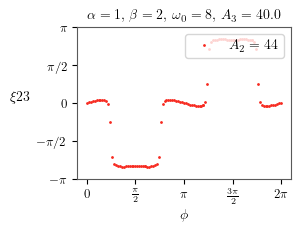

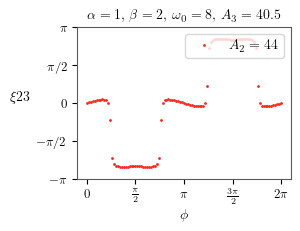

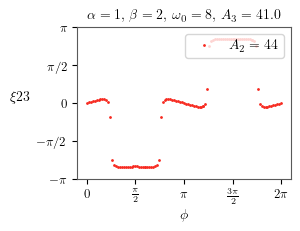

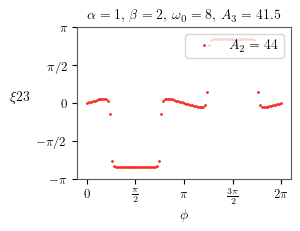

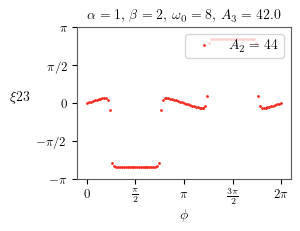

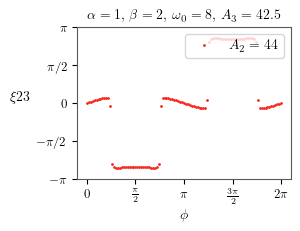

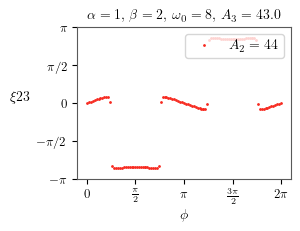

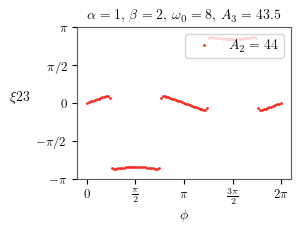

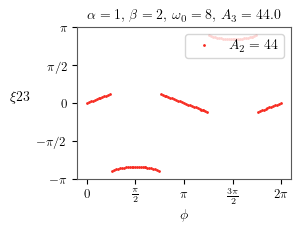

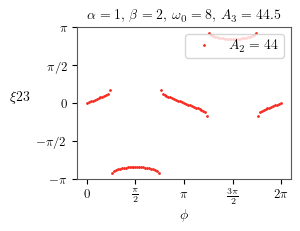

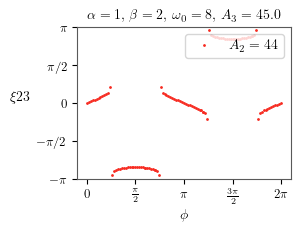

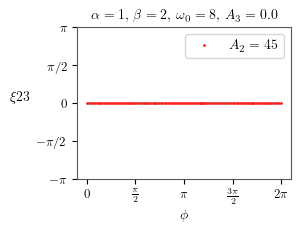

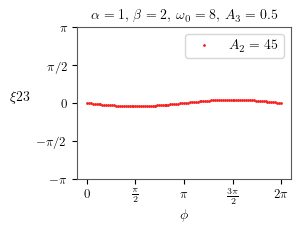

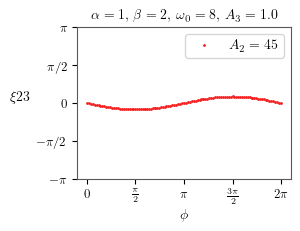

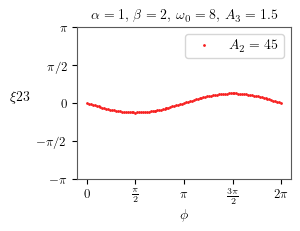

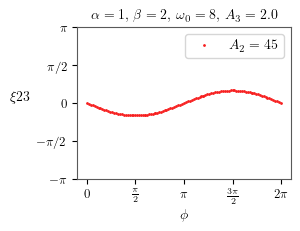

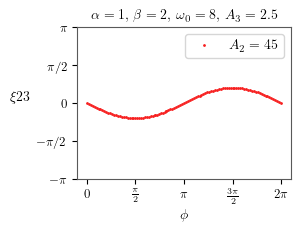

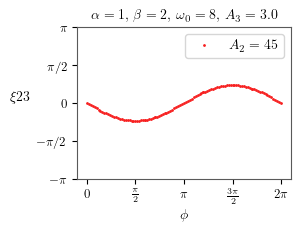

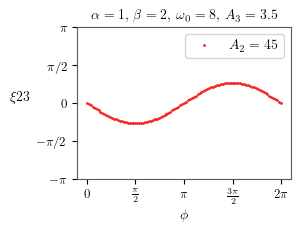

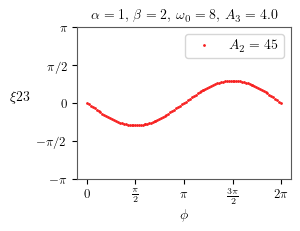

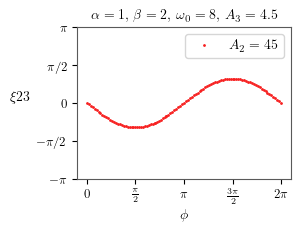

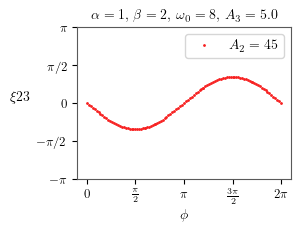

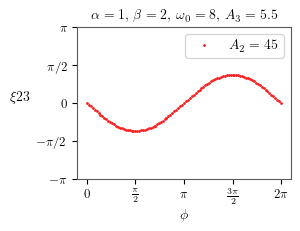

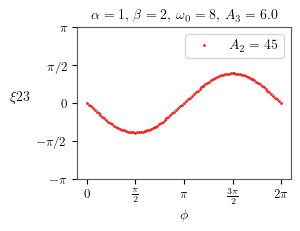

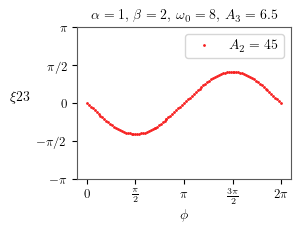

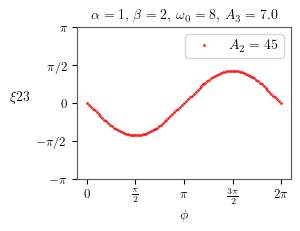

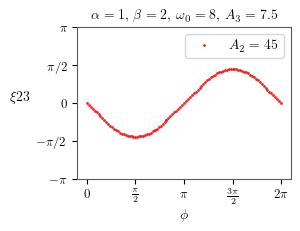

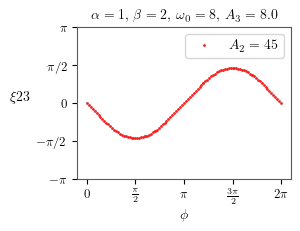

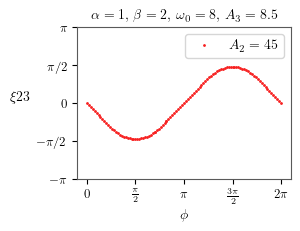

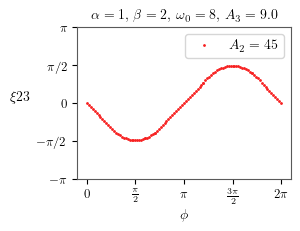

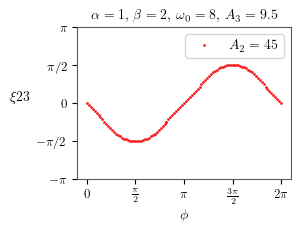

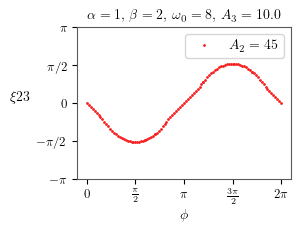

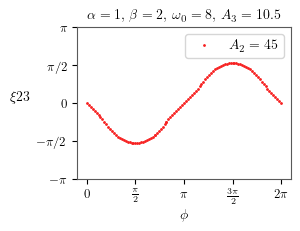

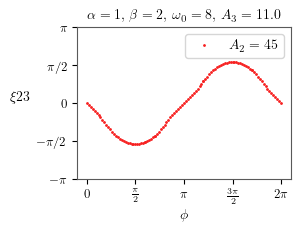

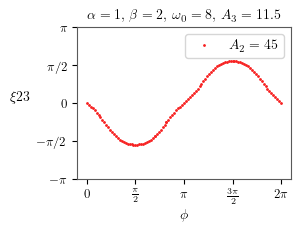

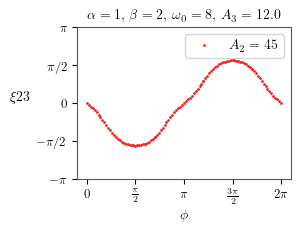

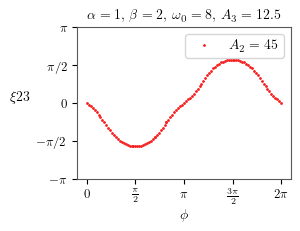

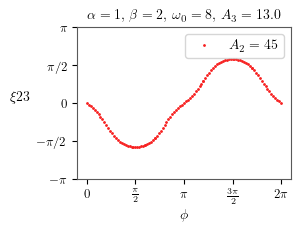

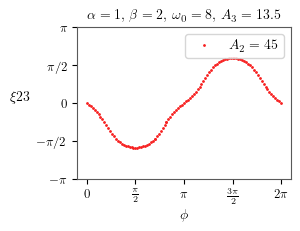

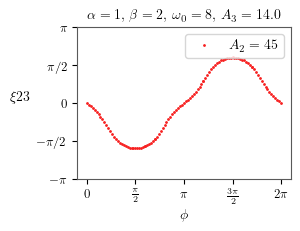

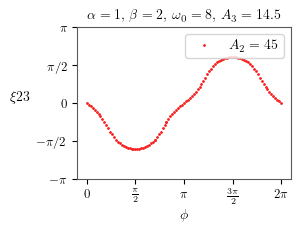

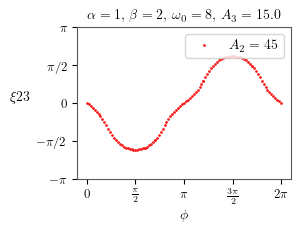

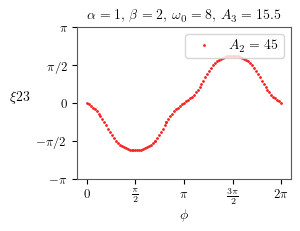

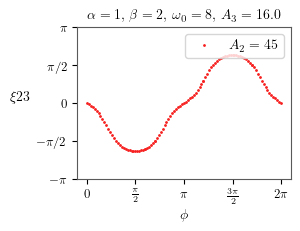

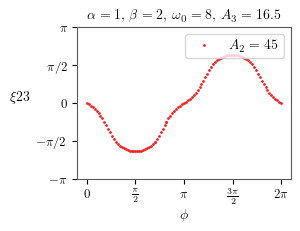

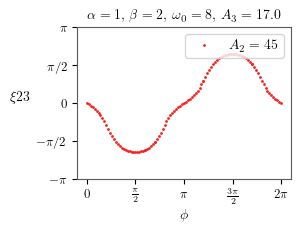

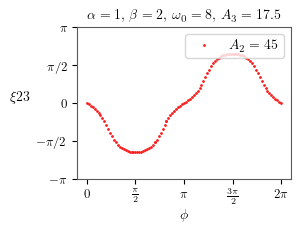

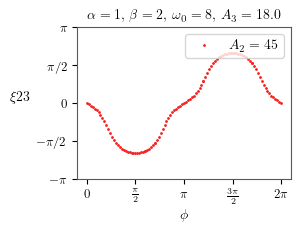

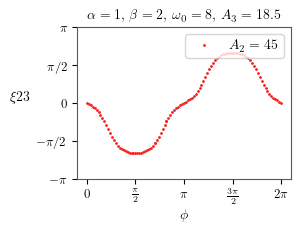

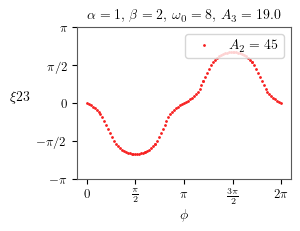

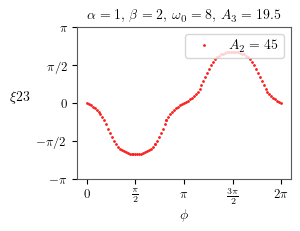

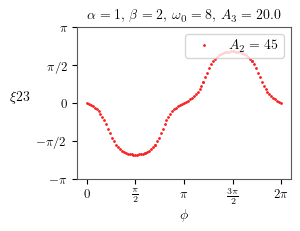

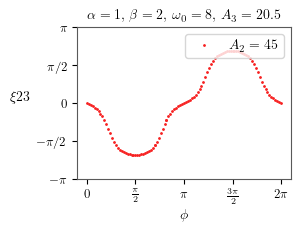

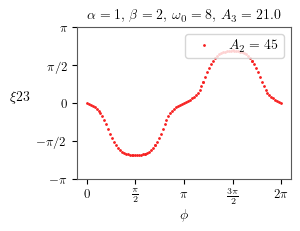

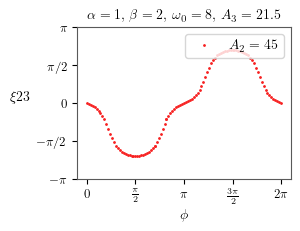

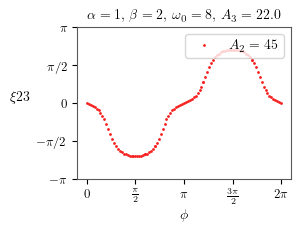

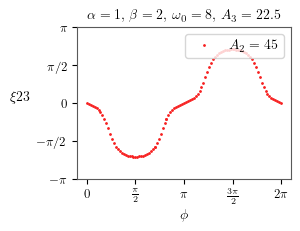

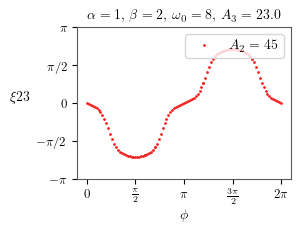

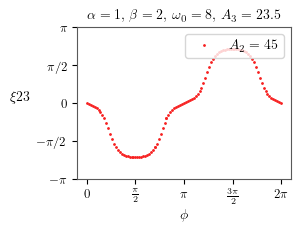

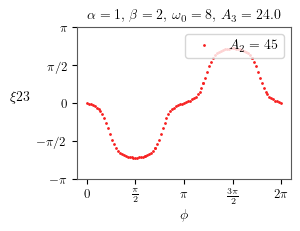

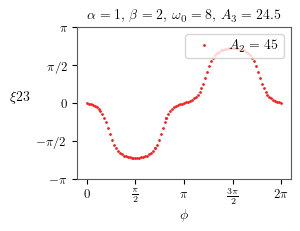

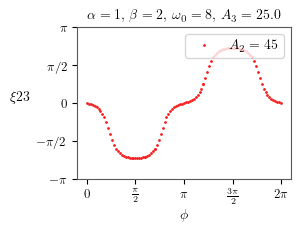

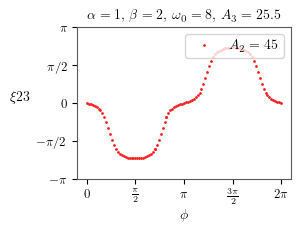

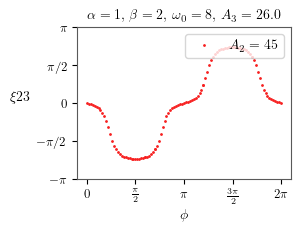

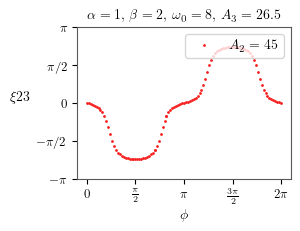

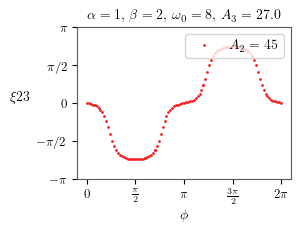

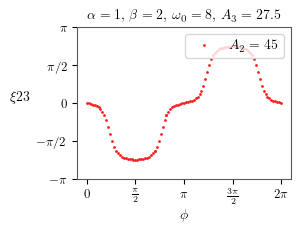

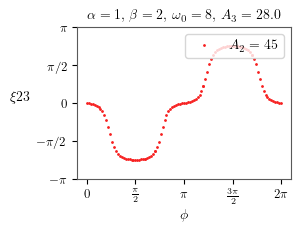

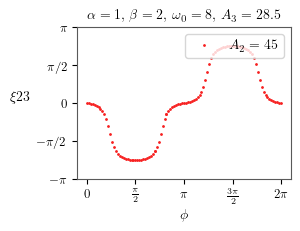

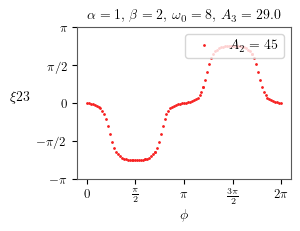

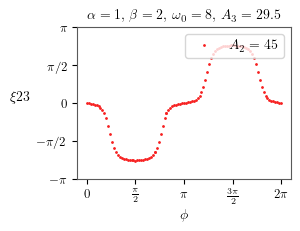

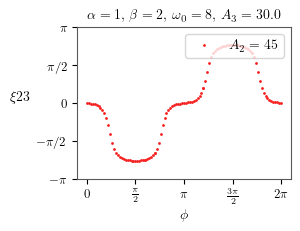

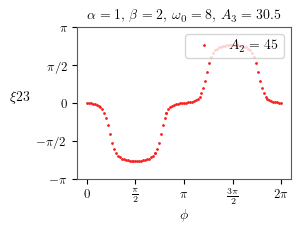

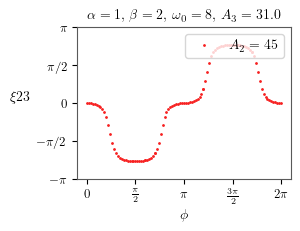

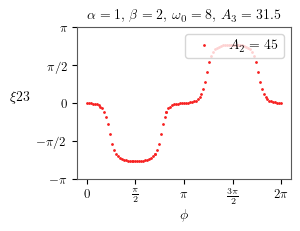

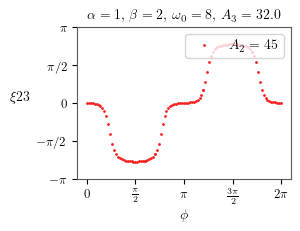

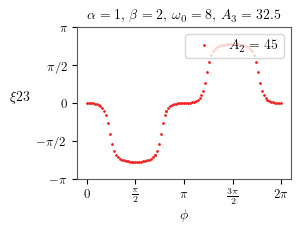

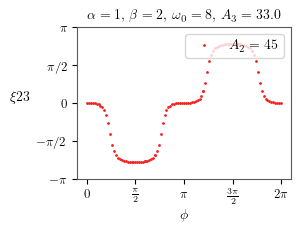

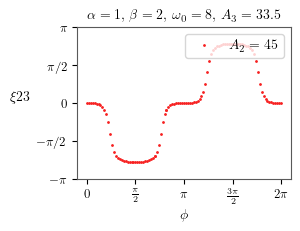

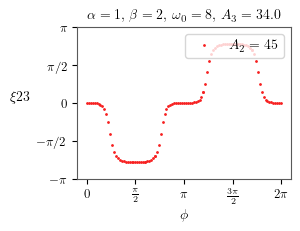

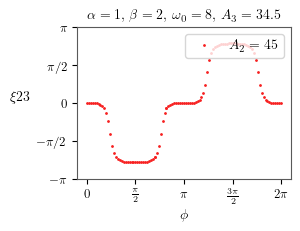

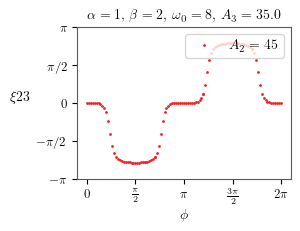

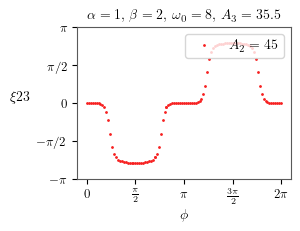

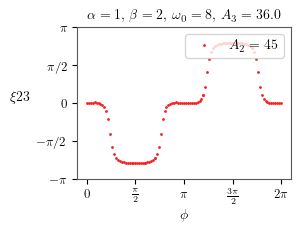

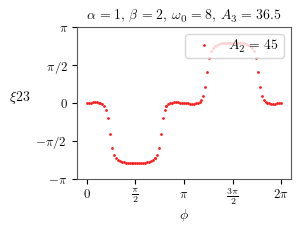

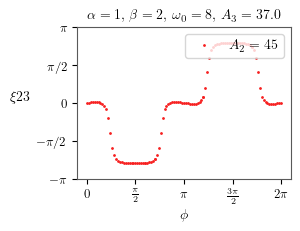

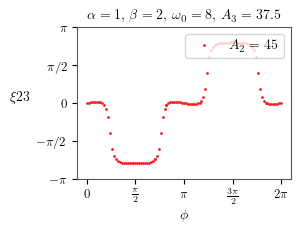

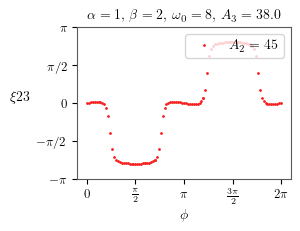

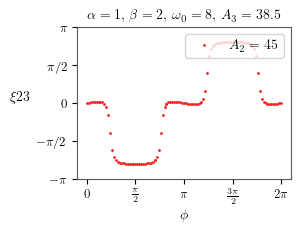

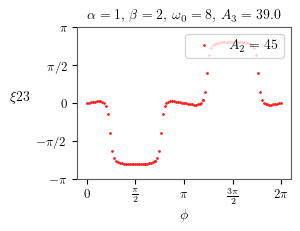

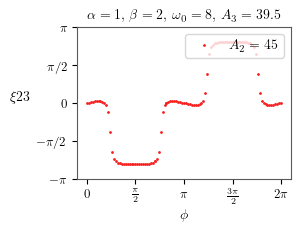

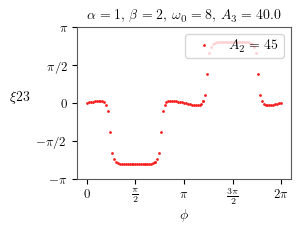

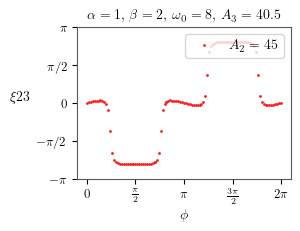

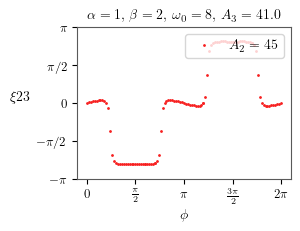

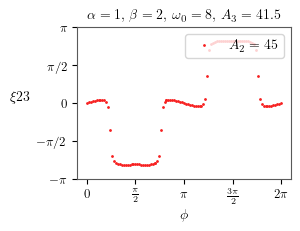

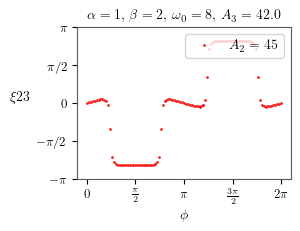

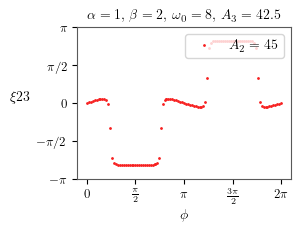

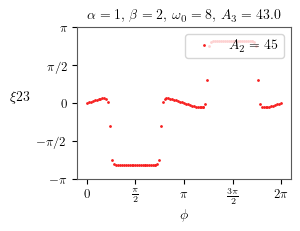

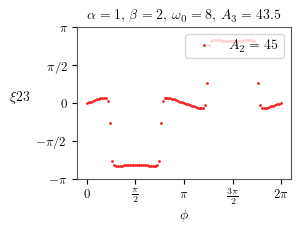

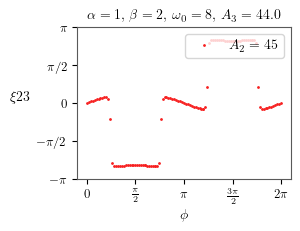

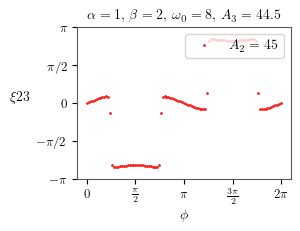

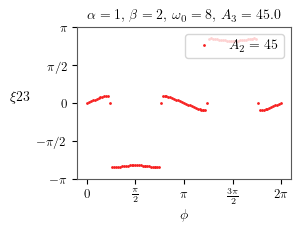

In [10]:
# """
# ABS VAL - keep omega_0 constant (omega0=8)
#     |
#     |
# \xi |
#     |
#     |____________
#           \phi
# - omega_0 constant (omega0=5)
# - compare Ham Evolution and First Term
# - color is A2
# - increase A3 over time
# """

# single A2 value




"""
Phases - vary phi
"""
omega0 = 8

# phasesFigLoc = Path().absolute().parent.parent/"figures"/"gif_frames"/"flux_vs_drive_variables"/"coloured_by_A2"/f"A2={A2}"



cm_unit = 1/2.54

link = 23
for A2 in [39, 40, 40.5, 43, 44, 45]:
    dfT = df[(df.A2 ==A2)
        #  &(df.A3 < jn_zeros(0,1)[0]*16)
        ]
    colour_index = A2*2 - 77
    colour = np.linspace(colour_rgb_list_reds[-2], colour_rgb_list_reds[-1],14)[int(colour_index)]

    phasesFigLoc = Path().absolute().parent.parent/"figures"/"gif_frames"/"indiv_link_flux_vs_drive_variables"/"coloured_by_A2"/f"A2={A2}"/f"J{link}_flux"
    ii = 0
    for A3 in np.linspace(0,45,91):
        # if A3 < jn_zeros(0,1)[0]*16: #smaller than like 38
        dfP = dfT[(dfT["omega0"]==omega0)&
                    (dfT["A3"]==A3)
                    ]
        
        fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
        title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

        data = dfP[f"xi{link}"].to_numpy()
        x = dfP["phi3/pi"].to_numpy()*pi

        sc = ax.plot(x, data, '.',
                        markersize=2,
                    #  ms=3,  marker=".", 
                        color=colour, # orange = "#F76120",# dark red = "#F72020"
                        label=rf"$A_2={A2}$" )

        ax.set_ylim([-pi, pi])
        ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
        ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
        ax.set_xlabel(r"$\phi$")

        ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])
        
        ax.set_yticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
        
        ax.set_ylabel(rf"$\xi{link}$", rotation=0, labelpad=12)
        # ax.set_ylim([-0.1,1.1])
        
        ax.legend(loc="upper right")
        # cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])
        
        ax.set_title(title)
        plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
        plt.show()
        ii+=1


In [ ]:
# """
# ABS VAL - keep omega_0 constant (omega0=8)
#     |
#     |
# \xi |
#     |
#     |____________
#           \phi
# - omega_0 constant (omega0=5)
# - compare Ham Evolution and First Term
# - color is A2
# - increase A3 over time
# """

# single A2 value
A2=17
col_rgb_vals = np.linspace(colour_rgb_list_greens[-2], colour_rgb_list_greens[-1], 10)
colour = tuple(col_rgb_vals[5]) 

dfT = df[(df.A2 ==A2)
        #  &(df.A3 < jn_zeros(0,1)[0]*16)
        ]

"""
Phases - vary phi
"""
omega0 = 8

phasesFigLoc = Path().absolute().parent.parent/"figures"/"gif_frames"/"flux_vs_drive_variables"/"coloured_by_A2"/f"A2={A2}"

cm_unit = 1/2.54

ii = 0
for A3 in np.linspace(0,45,91):
    # if A3 < jn_zeros(0,1)[0]*16: #smaller than like 38
    dfP = dfT[(dfT["omega0"]==omega0)&
                (dfT["A3"]==A3)
                ]
    
    fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
    title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

    data = dfP.xi.to_numpy()
    x = dfP["phi3/pi"].to_numpy()*pi

    sc = ax.plot(x, data, '.',
                    markersize=2,
                #  ms=3,  marker=".", 
                    color=colour, # orange = "#F76120",# dark red = "#F72020"
                    label=rf"$A_2={A2}$" )

    ax.set_ylim([-pi, pi])
    ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
    ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
    ax.set_xlabel(r"$\phi$")

    ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])
    
    ax.set_yticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
    
    ax.set_ylabel(r"$\xi$", rotation=0, labelpad=12)
    # ax.set_ylim([-0.1,1.1])
    
    ax.legend()
    # cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])
    
    ax.set_title(title)
    plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
    plt.show()
    ii+=1


In [ ]:
# """
# ABS VAL - keep omega_0 constant (omega0=8)
#     |
#     |
# \xi |
#     |
#     |____________
#           \phi
# - omega_0 constant (omega0=5)
# - compare Ham Evolution and First Term
# - color is A2
# - increase A3 over time
# """



# single A2 value
for A2 in [39, 40, 40.5, 41, 42, 43, 44, 45]:
    colour_index = A2*2 - 77
    colour = np.linspace(colour_rgb_list_reds[-2], colour_rgb_list_reds[-1],14)[int(colour_index)]

    dfT = df[(df.A2 ==A2)
            #  &(df.A3 < jn_zeros(0,1)[0]*16)
            ]

    """
    Phases - vary phi
    """
    omega0 = 8

    phasesFigLoc = Path().absolute().parent.parent/"figures"/"gif_frames"/"flux_vs_drive_variables"/"coloured_by_A2"/f"A2={A2}"/"t_fixed"

    cm_unit = 1/2.54

    ii = 0
    for A3 in np.linspace(0,45,91):
        # if A3 < jn_zeros(0,1)[0]*16: #smaller than like 38
        dfP = dfT[(dfT["omega0"]==omega0)&
                    (dfT["A3"]==A3)
                    ]
        
        fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
        title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$, fixed phase"

        data = dfP["xi_fixed"].to_numpy()
        x = dfP["phi3/pi"].to_numpy()*pi

        sc = ax.plot(x, data, '.',
                        markersize=2,
                    #  ms=3,  marker=".", 
                        color=colour, # orange = "#F76120",# dark red = "#F72020"
                        label=rf"$A_2={A2}$" )

        
        ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
        ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
        ax.set_xlabel(r"$\phi$")
        
        ax.set_ylim([-pi, pi])
        ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])
        # ax.set_yticks([-pi, -pi/2, 0, pi/2, pi, 1.5*pi, 2*pi, 2.5*pi, 3*pi])

        ax.set_yticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
        
        ax.set_ylabel(r"$\xi$", rotation=0, labelpad=12)
        # ax.set_ylim([-0.1,1.1])
        
        ax.legend()
        # cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])
        
        ax.set_title(title)
        plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
        plt.show()
        ii+=1


In [6]:
print(colour_index)

4.0


In [ ]:
# """
# ABS VAL - keep omega_0 constant (omega0=8)
#     |
#     |
# \xi |
#     |
#     |____________
#           \phi
# - omega_0 constant (omega0=5)
# - compare Ham Evolution and First Term
# - color is A2
# - increase A3 over time
# """



# single A2 value
A2=41
colour = np.linspace(colour_rgb_list_reds[-2], colour_rgb_list_reds[-1],14)[5]

dfT = df[(df.A2 ==A2)
        #  &(df.A3 < jn_zeros(0,1)[0]*16)
        ]

"""
Phases - vary phi
"""
omega0 = 8

phasesFigLoc = Path().absolute().parent.parent/"figures"/"gif_frames"/"flux_vs_drive_variables"/"coloured_by_A2"/f"A2={A2}"

cm_unit = 1/2.54

ii = 0
for A3 in np.linspace(0,45,91):
    # if A3 < jn_zeros(0,1)[0]*16: #smaller than like 38
    dfP = dfT[(dfT["omega0"]==omega0)&
                (dfT["A3"]==A3)
                ]
    
    fig, ax = plt.subplots(figsize=(7*cm_unit,5*cm_unit))
    title = r"$\alpha=1$, $\beta=2$, $\omega_0="+str(omega0)+r"$, $A_3="+str(A3)+r"$"

    data = dfP.xi.to_numpy()
    x = dfP["phi3/pi"].to_numpy()*pi

    sc = ax.plot(x, data, '.',
                    markersize=2,
                #  ms=3,  marker=".", 
                    color=colour, # orange = "#F76120",# dark red = "#F72020"
                    label=rf"$A_2={A2}$" )

    ax.set_ylim([-pi, pi])
    ax.set_xticks([0,pi/2, pi, 3*pi/2, 2*pi])
    ax.set_xticklabels([ '0',r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$",  r"$2\pi$"])
    ax.set_xlabel(r"$\phi$")

    ax.set_yticks([-pi, -pi/2, 0, pi/2, pi])
    
    ax.set_yticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
    
    ax.set_ylabel(r"$\xi$", rotation=0, labelpad=12)
    # ax.set_ylim([-0.1,1.1])
    
    ax.legend()
    # cbar.ax.set_yticklabels(['0', r'$\pi/2$', r'$\pi$', r"$3\pi/2$", r"$2\pi$"])
    
    ax.set_title(title)
    plt.savefig(phasesFigLoc/f"Frame{ii}.png", format='png', bbox_inches='tight')
    plt.show()
    ii+=1
